In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats
import statistics as st

In [3]:
data = pd.read_csv("../dataset/dataset_clean.csv")
data.columns

Index(['Index', 'Delivery_person_Age', 'Delivery_person_ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Time_order', 'Time_order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'Multiple_deliveries', 'Festival', 'City',
       'Time_taken_(min)', 'Distance', 'Hour_order', 'Session', 'WeekDay'],
      dtype='object')

In [2]:
data = pd.read_csv("../dataset/dataset_clean.csv")
data=data.drop(columns='Index')
del data['Time_order_picked']
del data['Time_order']
data.head(10)

FileNotFoundError: [Errno 2] No such file or directory: '../dataset/dataset_clean.csv'

In [481]:
data.shape

(41062, 20)

<AxesSubplot: xlabel='Time_taken_(min)', ylabel='Count'>

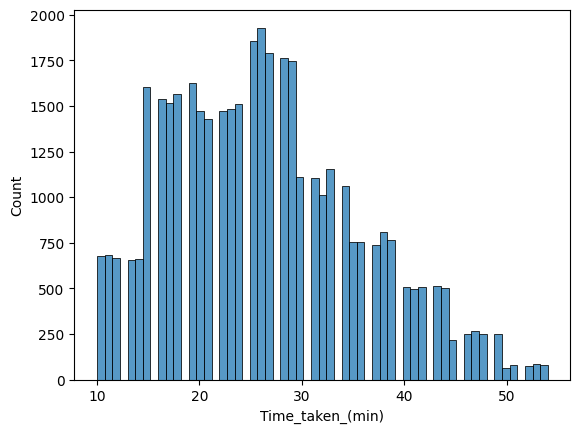

In [482]:
import seaborn as sns
sns.histplot(data = data, x = 'Time_taken_(min)')

<AxesSubplot: xlabel='Distance', ylabel='Count'>

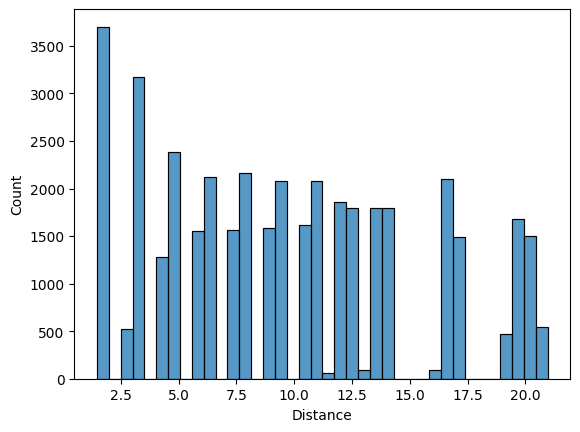

In [483]:
import seaborn as sns
sns.histplot(data = data, x = 'Distance')

# EDA

In [484]:
EDA_data = data

In [485]:
EDA_data.columns

Index(['Delivery_person_Age', 'Delivery_person_ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'Multiple_deliveries', 'Festival', 'City',
       'Distance', 'Time_taken_(min)', 'Hour_order', 'Hour_picked', 'WeekDay',
       'Day of month'],
      dtype='object')

In [486]:
categoryF = ['Delivery_person_Age','Delivery_person_ratings','Weather_conditions','Road_traffic_density','Vehicle_condition',
             'Type_of_order','Type_of_vehicle','Multiple_deliveries','Festival','City','Hour_order','Hour_picked','WeekDay','Day of month']
numericalF = ['Distance','Time_taken_(min)']
# Remove location

## Delivery_person_Age

In [487]:
EDA_data['Delivery_person_Age'].value_counts()

24.0    3076
35.0    2093
36.0    2070
37.0    2041
30.0    2036
22.0    2021
38.0    2018
33.0    2010
29.0    2007
32.0    1999
28.0    1997
34.0    1986
25.0    1984
26.0    1980
39.0    1968
27.0    1966
21.0    1961
20.0    1955
31.0    1936
23.0    1933
15.0      25
Name: Delivery_person_Age, dtype: int64

F_onewayResult(statistic=270.94334333643644, pvalue=0.0)


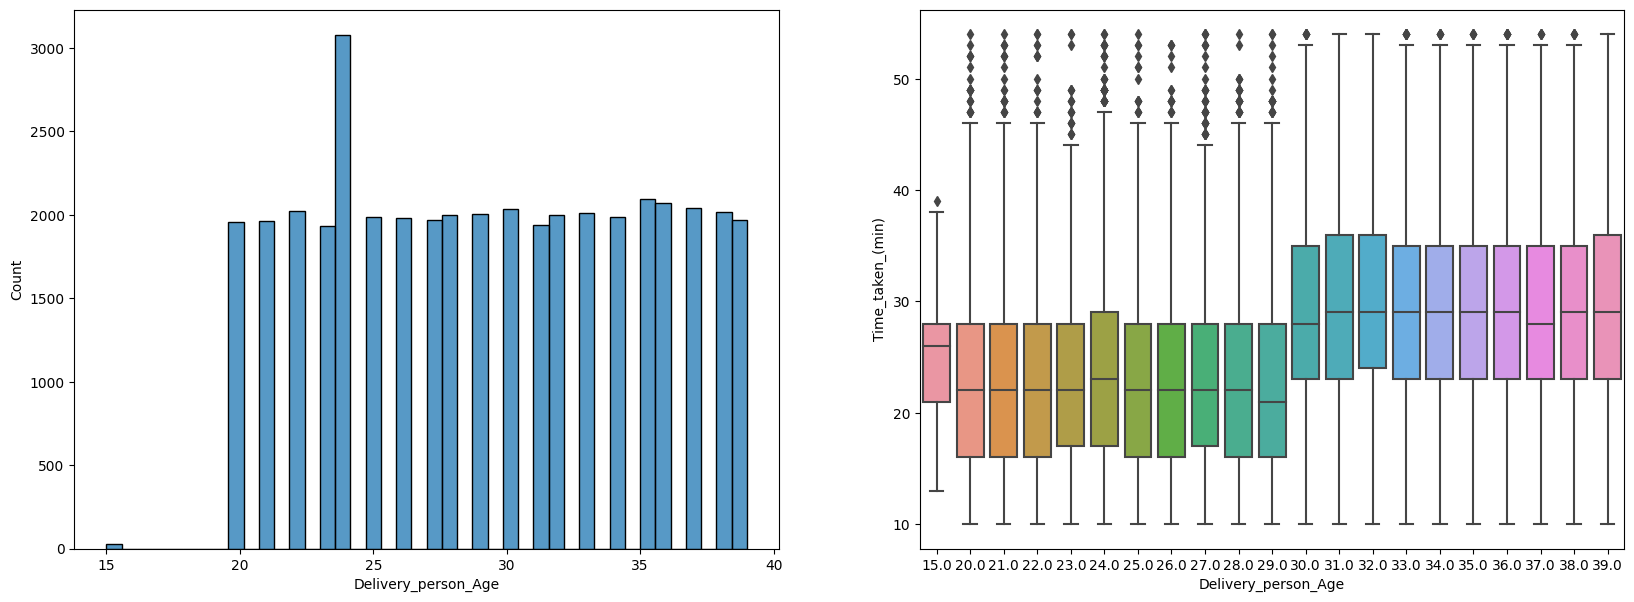

In [488]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.histplot(data = EDA_data, x = 'Delivery_person_Age')
plt.subplot(1,2,2)
sns.boxplot(data = EDA_data, x = 'Delivery_person_Age', y = 'Time_taken_(min)')
#----------------------------------------------------------------------
from scipy.stats import f_oneway
print(f_oneway(*EDA_data.groupby('Delivery_person_Age')['Time_taken_(min)'].apply(list)))

Age = 15 (Outlier)

In [489]:
EDA_data = EDA_data[EDA_data['Delivery_person_Age'] != 15 ]

F_onewayResult(statistic=285.11139772286185, pvalue=0.0)


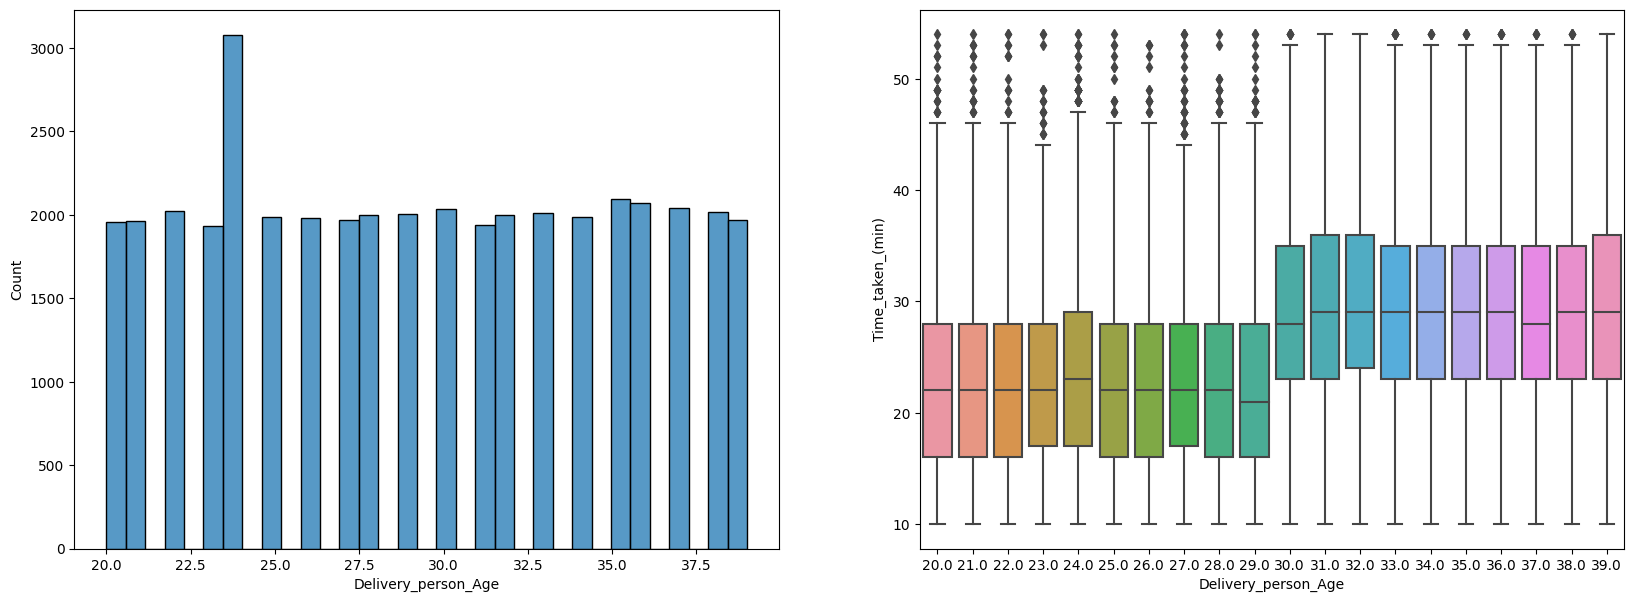

In [490]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.histplot(data = EDA_data, x = 'Delivery_person_Age')
plt.subplot(1,2,2)
sns.boxplot(data = EDA_data, x = 'Delivery_person_Age', y = 'Time_taken_(min)')
#----------------------------------------------------------------------
from scipy.stats import f_oneway
print(f_oneway(*EDA_data.groupby('Delivery_person_Age')['Time_taken_(min)'].apply(list)))

## Delivery_person_ratings

In [491]:
EDA_data['Delivery_person_ratings'].value_counts(normalize=True).sort_index()*100

2.5     0.043863
2.6     0.048737
2.7     0.051173
2.8     0.041426
2.9     0.043863
3.0     0.014621
3.1     0.068231
3.2     0.063357
3.3     0.056047
3.4     0.075542
3.5     0.575091
3.6     0.470307
3.7     0.492239
3.8     0.523917
3.9     0.424008
4.0     2.422204
4.1     3.216609
4.2     3.238541
4.3     3.165436
4.4     3.028974
4.5     7.439628
4.6    15.495772
4.7    15.824744
4.8    18.556425
4.9    15.727271
5.0     8.891976
Name: Delivery_person_ratings, dtype: float64

F_onewayResult(statistic=398.3933941785758, pvalue=0.0)


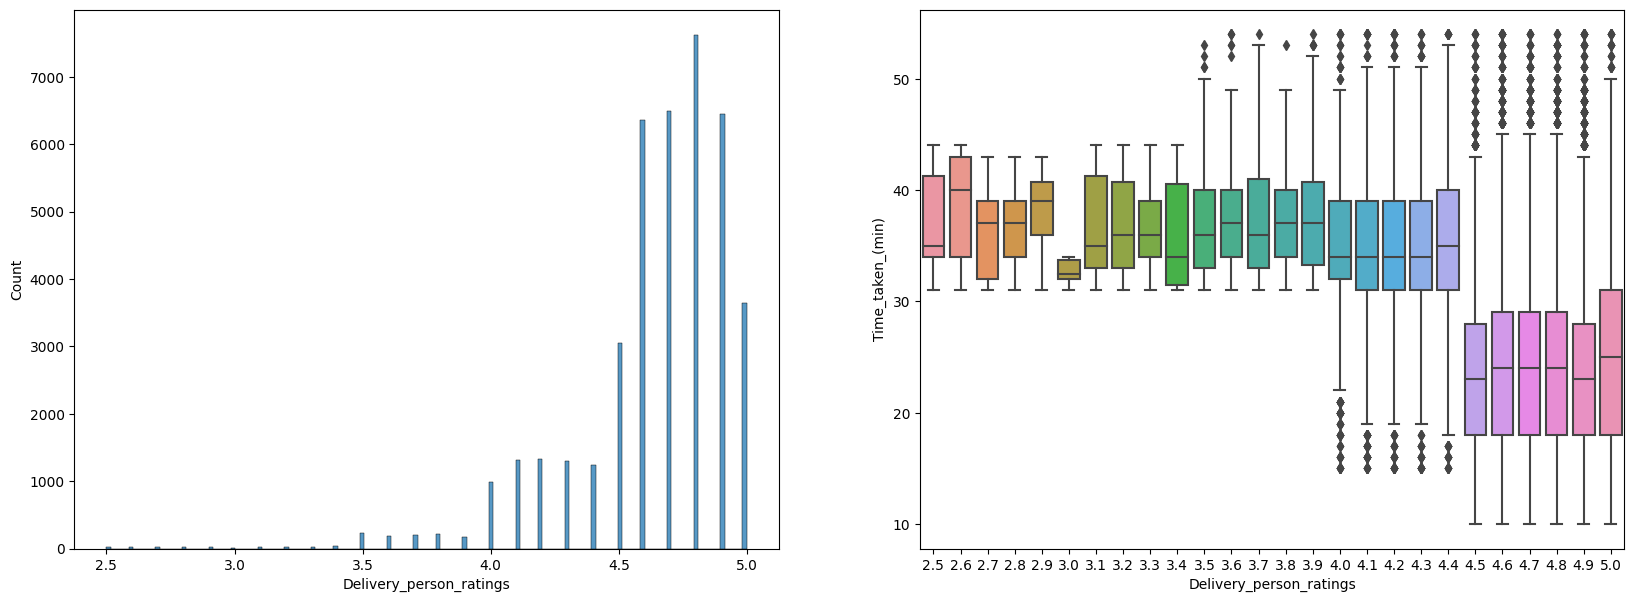

In [492]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.histplot(data = EDA_data, x = 'Delivery_person_ratings')
plt.subplot(1,2,2)
sns.boxplot(data = EDA_data, x = 'Delivery_person_ratings', y = 'Time_taken_(min)')
#----------------------------------------------------------------------
from scipy.stats import f_oneway
print(f_oneway(*EDA_data.groupby('Delivery_person_ratings')['Time_taken_(min)'].apply(list)))

In [493]:
EDA_data['Delivery_person_ratings'].astype(int)

0        4
1        4
2        4
3        4
4        4
        ..
41057    4
41058    4
41059    3
41060    4
41061    4
Name: Delivery_person_ratings, Length: 41037, dtype: int32

In [494]:
EDA_data['Delivery_person_ratings'].value_counts()

4.8    7615
4.7    6494
4.9    6454
4.6    6359
5.0    3649
4.5    3053
4.2    1329
4.1    1320
4.3    1299
4.4    1243
4.0     994
3.5     236
3.8     215
3.7     202
3.6     193
3.9     174
3.4      31
3.1      28
3.2      26
3.3      23
2.7      21
2.6      20
2.9      18
2.5      18
2.8      17
3.0       6
Name: Delivery_person_ratings, dtype: int64

In [495]:
for i in range(len(EDA_data['Delivery_person_ratings'])):
    EDA_data['Delivery_person_ratings'] = EDA_data['Delivery_person_ratings'].astype(int)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8724\3678482677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EDA_data['Delivery_person_ratings'] = EDA_data['Delivery_person_ratings'].astype(int)


F_onewayResult(statistic=593.4635217258248, pvalue=0.0)


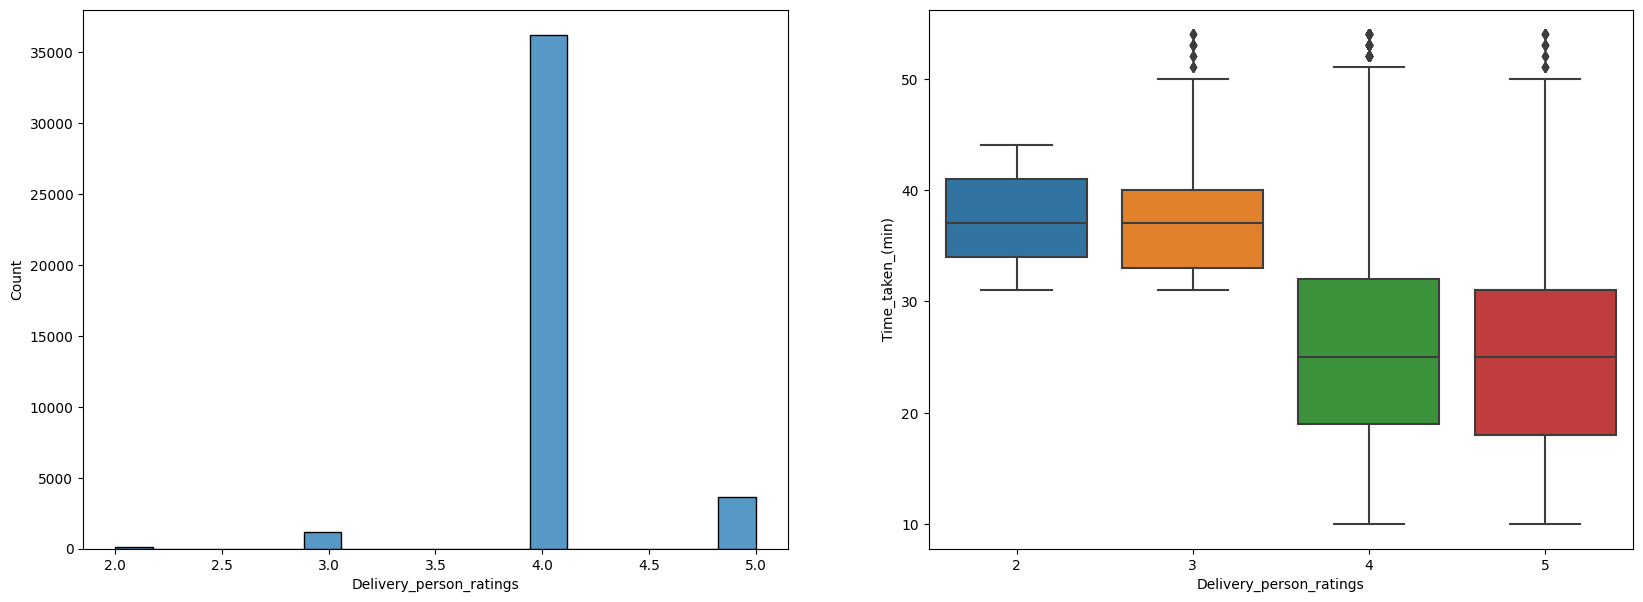

In [496]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.histplot(data = EDA_data, x = 'Delivery_person_ratings')
plt.subplot(1,2,2)
sns.boxplot(data = EDA_data, x = 'Delivery_person_ratings', y = 'Time_taken_(min)')
#----------------------------------------------------------------------
from scipy.stats import f_oneway
print(f_oneway(*EDA_data.groupby('Delivery_person_ratings')['Time_taken_(min)'].apply(list)))

## Weather_conditions

In [497]:
EDA_data['Weather_conditions'].value_counts()

Fog           6951
Stormy        6921
Cloudy        6869
Sandstorms    6841
Windy         6784
Sunny         6671
Name: Weather_conditions, dtype: int64

F_onewayResult(statistic=558.115480636497, pvalue=0.0)


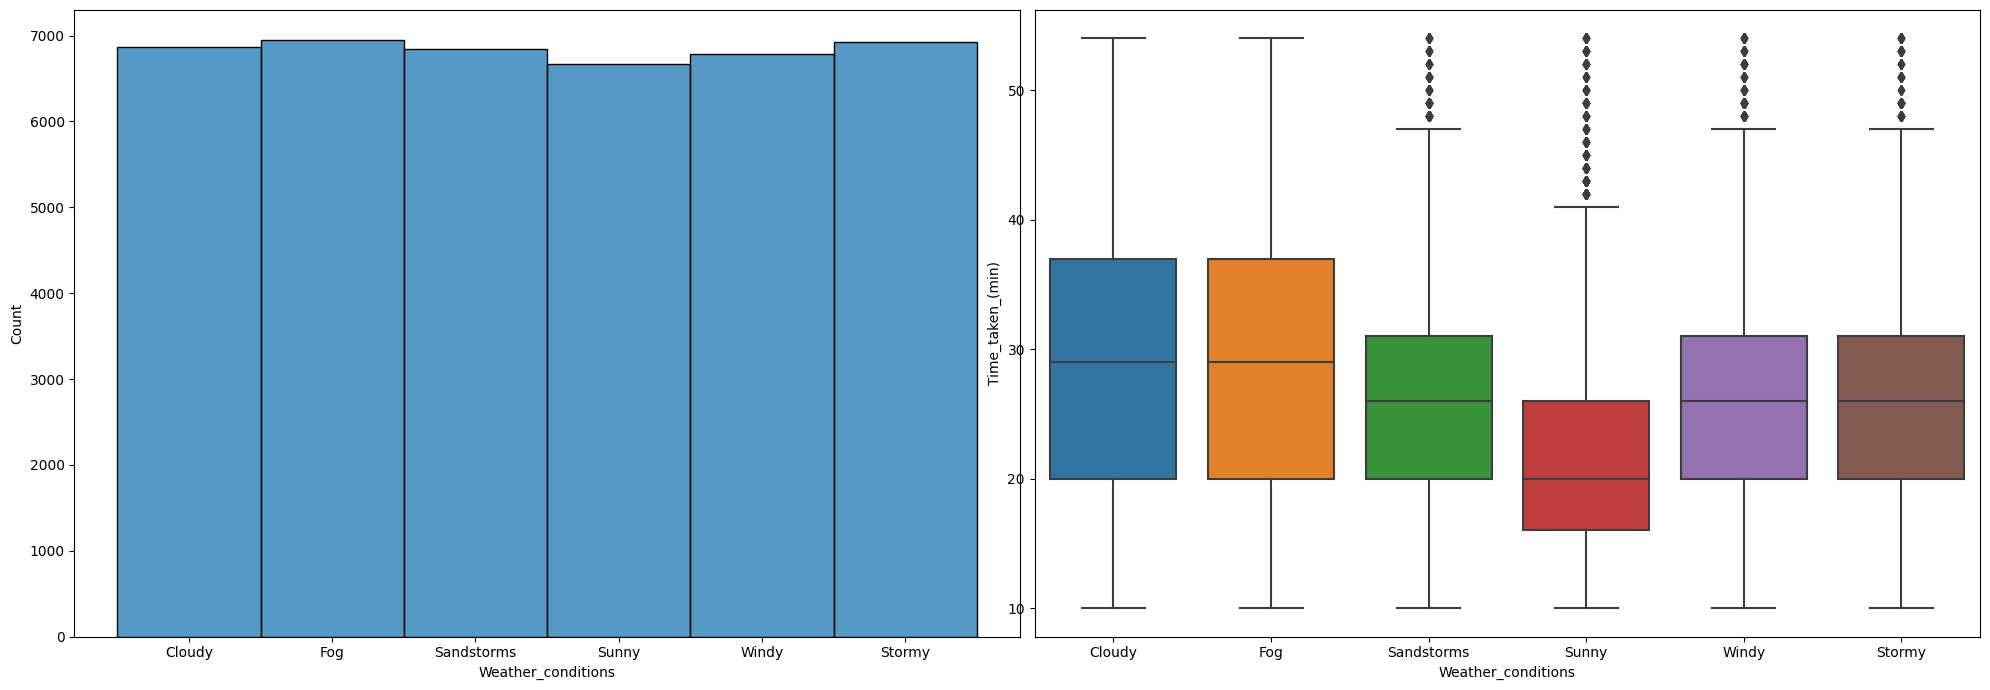

In [498]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.histplot(data = EDA_data, x = 'Weather_conditions')
plt.tight_layout()
plt.subplot(1,2,2)
sns.boxplot(data = EDA_data, x = 'Weather_conditions', y = 'Time_taken_(min)')
#----------------------------------------------------------------------
from scipy.stats import f_oneway
print(f_oneway(*EDA_data.groupby('Weather_conditions')['Time_taken_(min)'].apply(list)))

## Road_traffic_density

In [499]:
EDA_data['Road_traffic_density'].value_counts()

Low       14056
Jam       12928
Medium    10015
High       4038
Name: Road_traffic_density, dtype: int64

F_onewayResult(statistic=3105.7431431678315, pvalue=0.0)


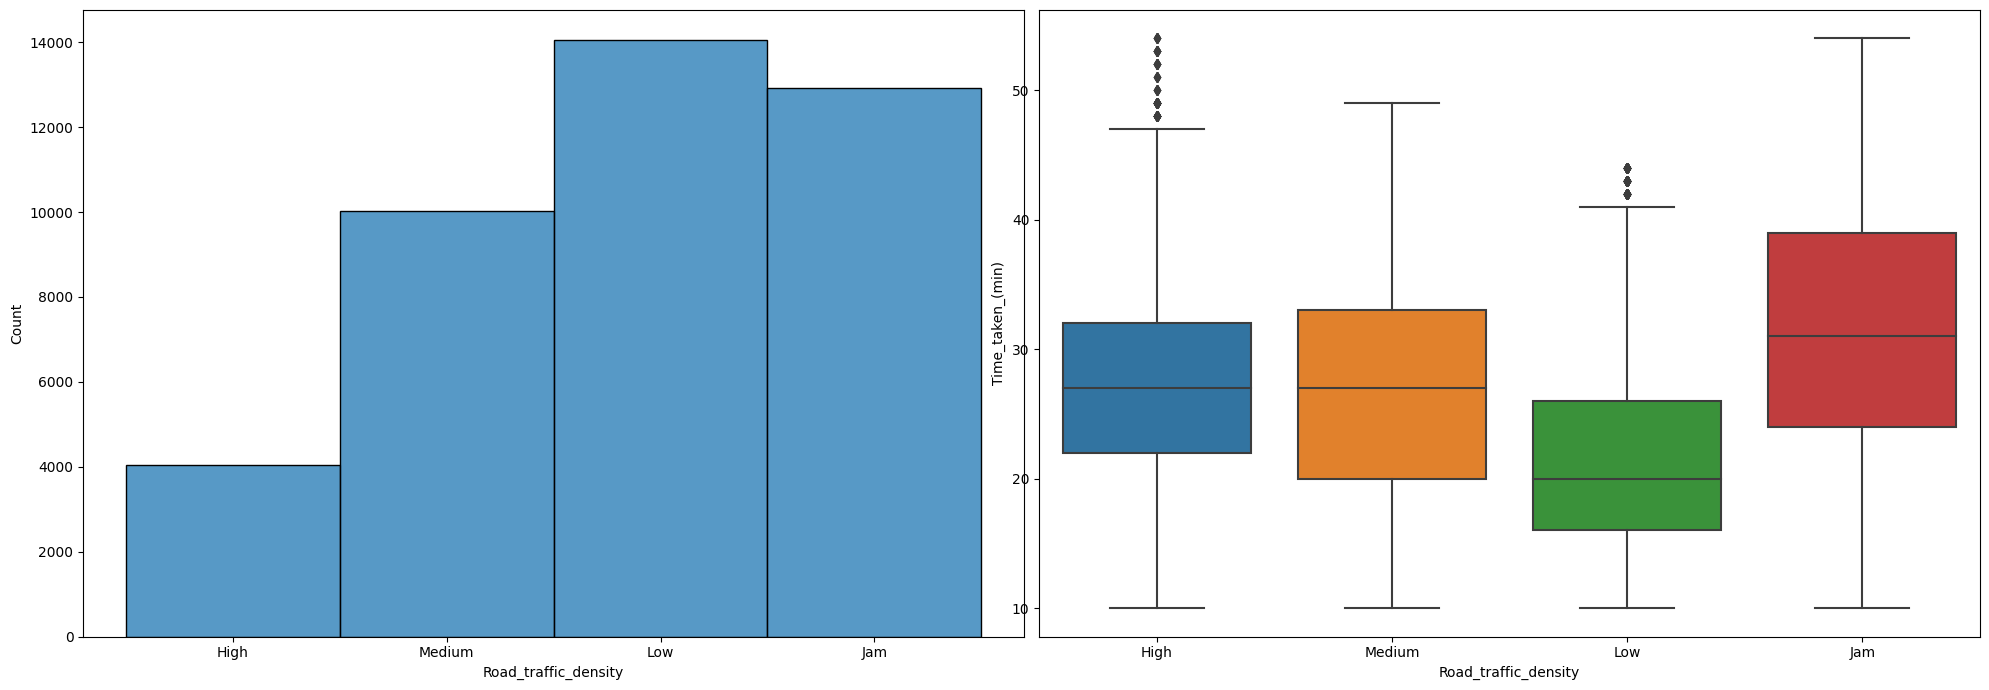

In [500]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.histplot(data = EDA_data, x = 'Road_traffic_density')
plt.tight_layout()
plt.subplot(1,2,2)
sns.boxplot(data = EDA_data, x = 'Road_traffic_density', y = 'Time_taken_(min)')
#----------------------------------------------------------------------
from scipy.stats import f_oneway
print(f_oneway(*EDA_data.groupby('Road_traffic_density')['Time_taken_(min)'].apply(list)))

## Vehicle_conditions

In [501]:
EDA_data['Vehicle_condition'].value_counts()

1    13710
0    13668
2    13655
3        4
Name: Vehicle_condition, dtype: int64

F_onewayResult(statistic=1198.283347101826, pvalue=0.0)


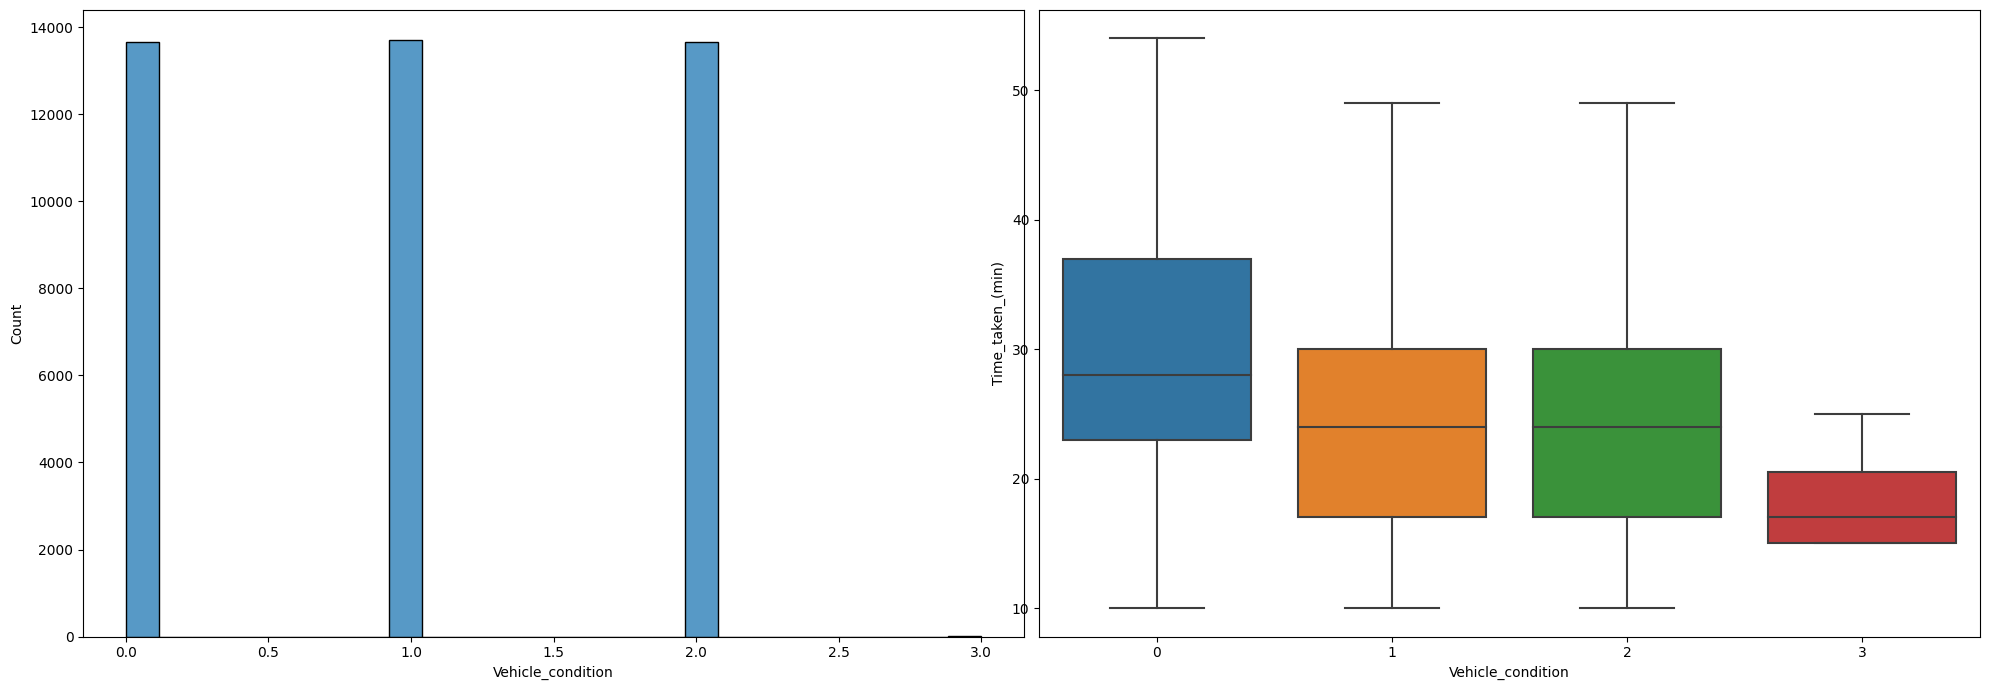

In [502]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.histplot(data = EDA_data, x = 'Vehicle_condition')
plt.tight_layout()
plt.subplot(1,2,2)
sns.boxplot(data = EDA_data, x = 'Vehicle_condition', y = 'Time_taken_(min)')
#----------------------------------------------------------------------
from scipy.stats import f_oneway
print(f_oneway(*EDA_data.groupby('Vehicle_condition')['Time_taken_(min)'].apply(list)))

Xóa vehicle_conditions = 3 

## Type_of_order

In [503]:
EDA_data['Type_of_order'].value_counts()

Snack     10379
Meal      10264
Drinks    10240
Buffet    10154
Name: Type_of_order, dtype: int64

F_onewayResult(statistic=2.0398329853543187, pvalue=0.10595656085687388)


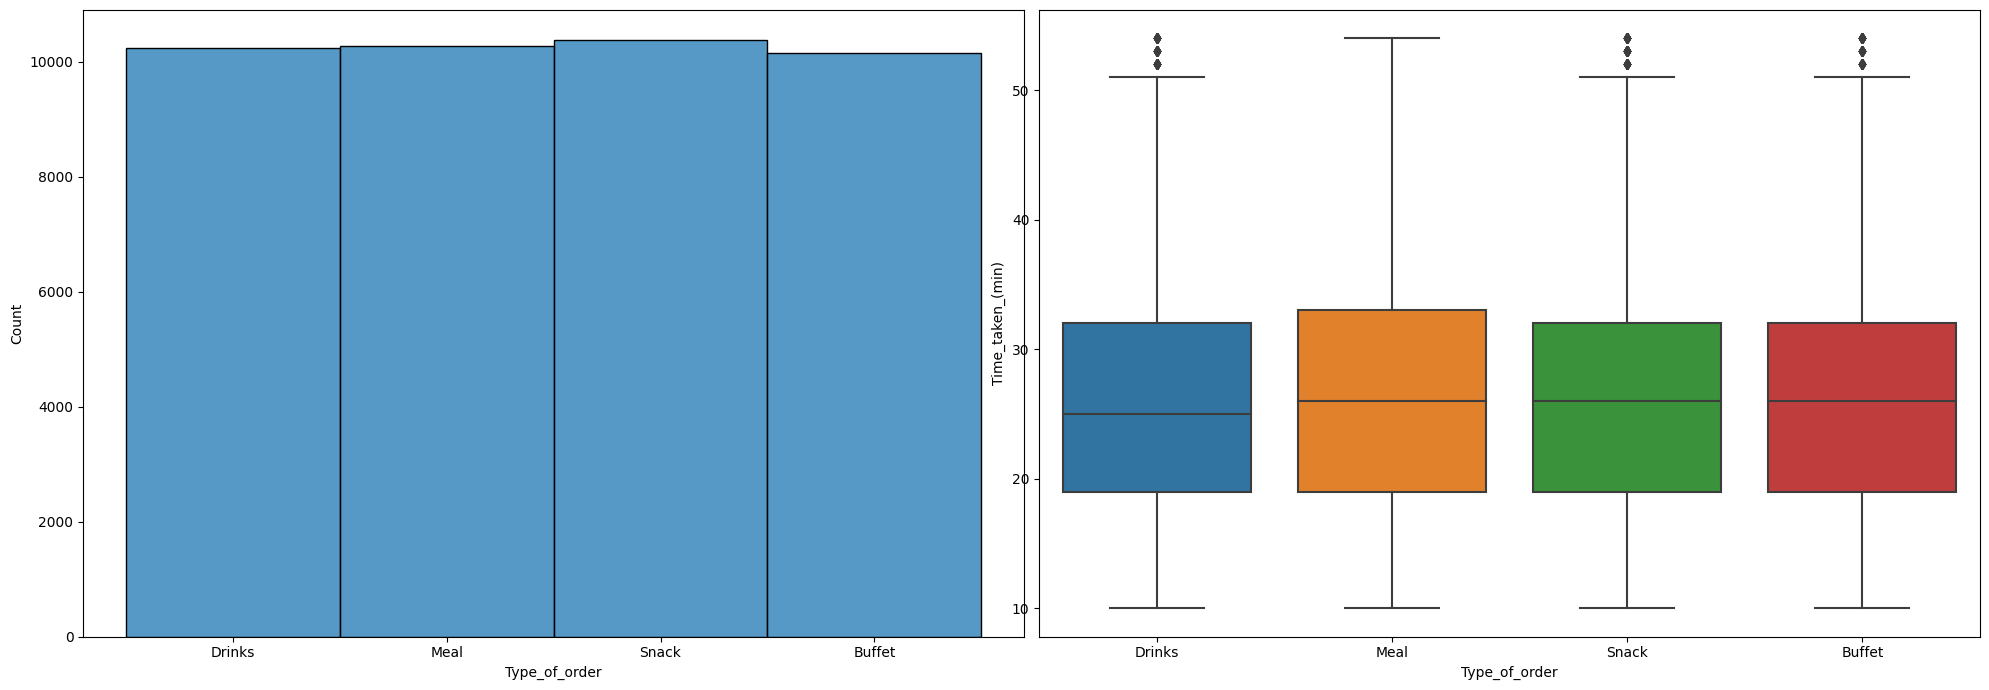

In [504]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.histplot(data = EDA_data, x = 'Type_of_order')
plt.tight_layout()
plt.subplot(1,2,2)
sns.boxplot(data = EDA_data, x = 'Type_of_order', y = 'Time_taken_(min)')
#----------------------------------------------------------------------
from scipy.stats import f_oneway
print(f_oneway(*EDA_data.groupby('Type_of_order')['Time_taken_(min)'].apply(list)))

## Type_of_vehicle

In [505]:
EDA_data['Type_of_vehicle'].value_counts()

motorcycle          24052
scooter             13730
electric_scooter     3254
bicycle                 1
Name: Type_of_vehicle, dtype: int64

In [506]:
EDA_data = EDA_data[EDA_data['Type_of_vehicle'] != 'bicycle']

'bicycle' là outlier

F_onewayResult(statistic=566.921037848765, pvalue=1.3478101573146998e-243)


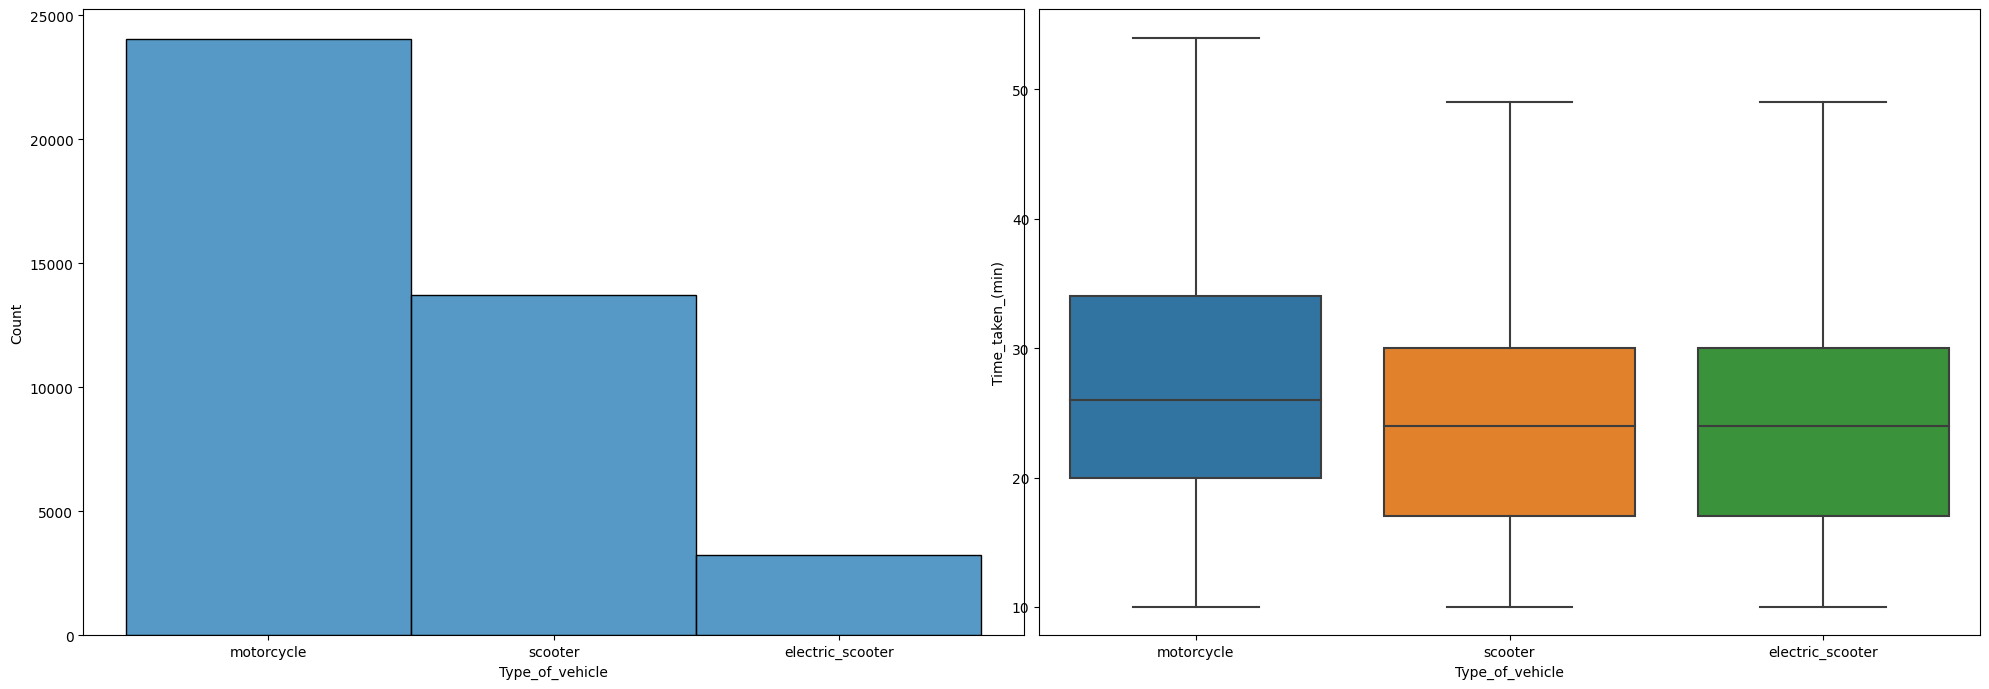

In [507]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.histplot(data = EDA_data, x = 'Type_of_vehicle')
plt.tight_layout()
plt.subplot(1,2,2)
sns.boxplot(data = EDA_data, x = 'Type_of_vehicle', y = 'Time_taken_(min)')
#----------------------------------------------------------------------
from scipy.stats import f_oneway
print(f_oneway(*EDA_data.groupby('Type_of_vehicle')['Time_taken_(min)'].apply(list)))

In [508]:
EDA_data['Type_of_vehicle'].value_counts()

motorcycle          24052
scooter             13730
electric_scooter     3254
Name: Type_of_vehicle, dtype: int64

F_onewayResult(statistic=566.921037848765, pvalue=1.3478101573146998e-243)


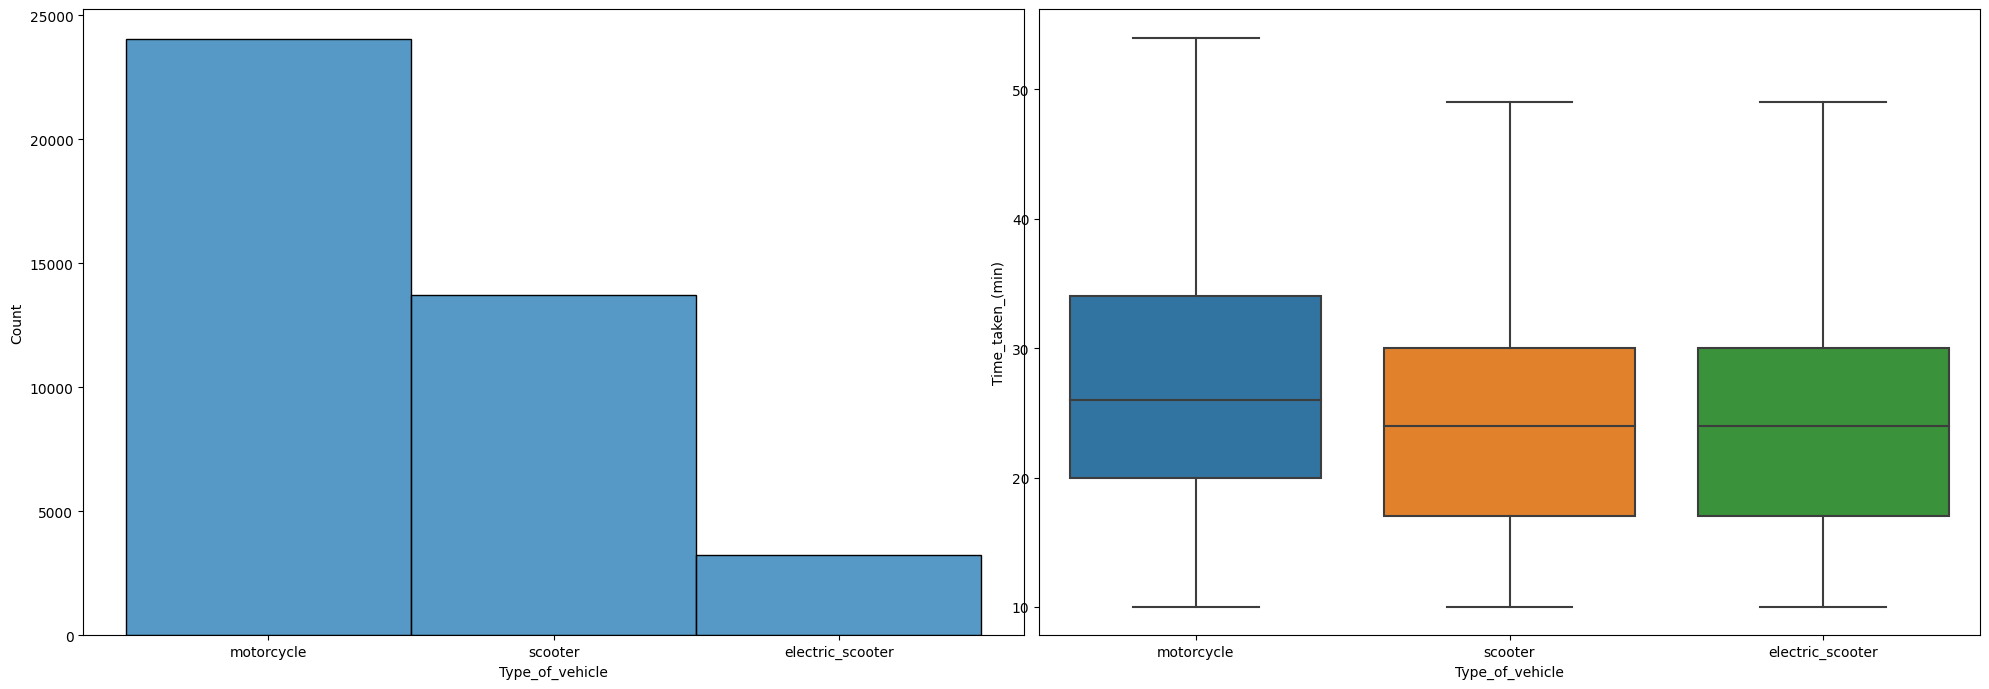

In [509]:
EDA_data = EDA_data[EDA_data['Type_of_vehicle'] != 'bicycle']
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.histplot(data = EDA_data, x = 'Type_of_vehicle')
plt.tight_layout()
plt.subplot(1,2,2)
sns.boxplot(data = EDA_data, x = 'Type_of_vehicle', y = 'Time_taken_(min)')
#----------------------------------------------------------------------
from scipy.stats import f_oneway
print(f_oneway(*EDA_data.groupby('Type_of_vehicle')['Time_taken_(min)'].apply(list)))

In [510]:
EDA_data.groupby('Type_of_vehicle')['Time_taken_(min)'].apply(list)

Type_of_vehicle
electric_scooter    [18.0, 30.0, 30.0, 23.0, 28.0, 47.0, 32.0, 13....
motorcycle          [25.0, 11.0, 47.0, 31.0, 20.0, 29.0, 34.0, 29....
scooter             [40.0, 30.0, 19.0, 15.0, 32.0, 37.0, 33.0, 11....
Name: Time_taken_(min), dtype: object

In [511]:
electric_scooter = EDA_data.groupby('Type_of_vehicle')['Time_taken_(min)'].apply(list)[0]
scooter          = EDA_data.groupby('Type_of_vehicle')['Time_taken_(min)'].apply(list)[2]
f_oneway(electric_scooter,scooter)    
# p value > 0.05 => electric_scooter == scooter
EDA_data['Type_of_vehicle'].replace('electric_scooter','scooter',inplace=True)

In [512]:
EDA_data['Type_of_vehicle'].value_counts()

motorcycle    24052
scooter       16984
Name: Type_of_vehicle, dtype: int64

F_onewayResult(statistic=1133.4974150543533, pvalue=3.825080933891589e-245)


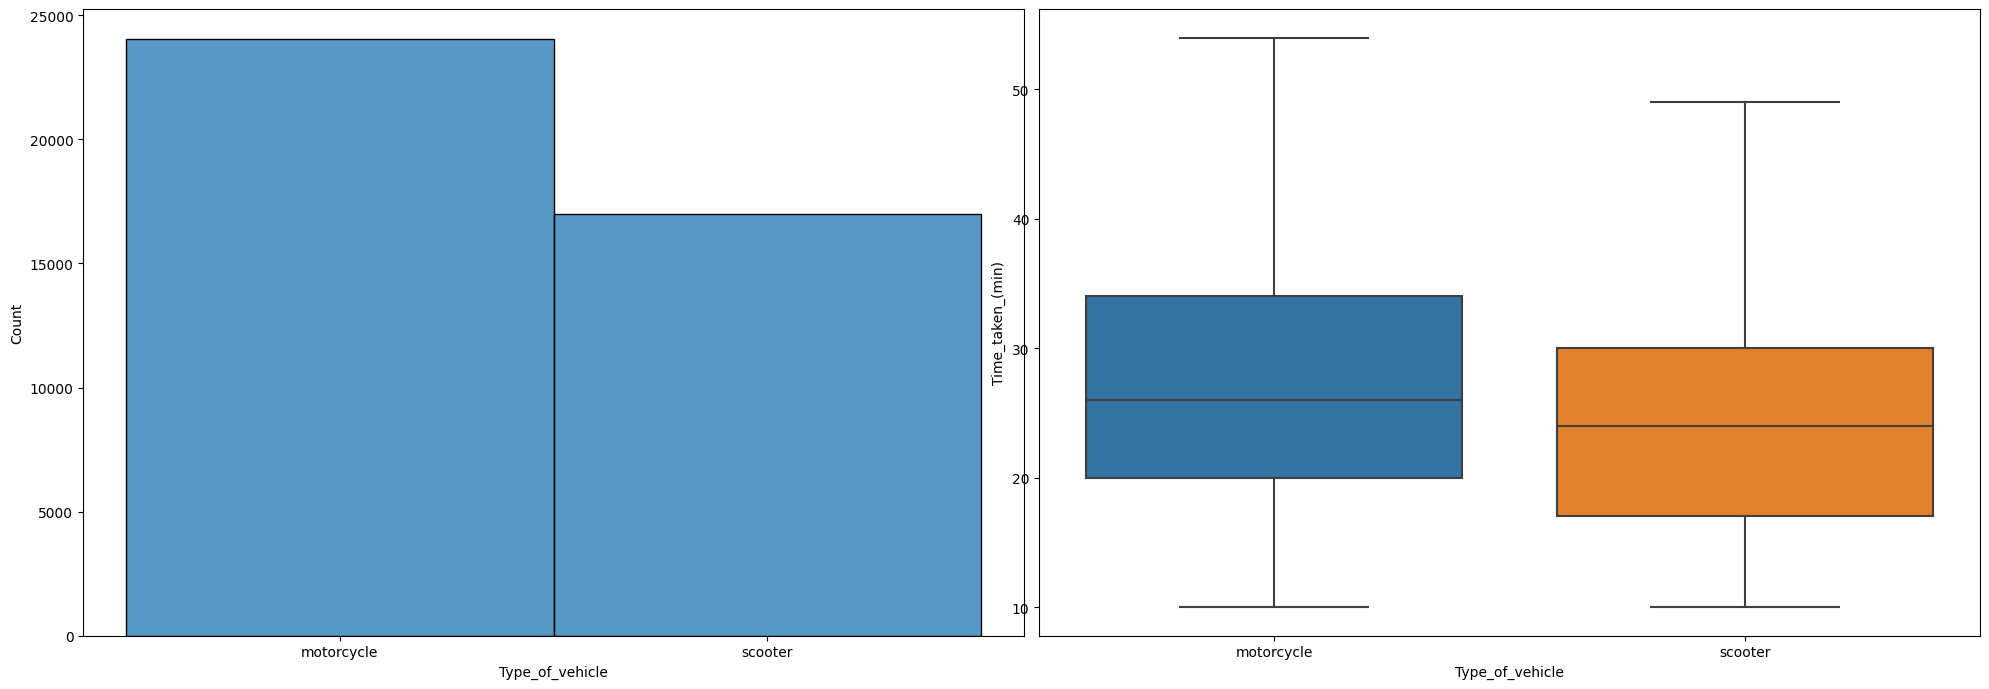

In [513]:
EDA_data = EDA_data[EDA_data['Type_of_vehicle'] != 'bicycle']
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.histplot(data = EDA_data, x = 'Type_of_vehicle')
plt.tight_layout()
plt.subplot(1,2,2)
sns.boxplot(data = EDA_data, x = 'Type_of_vehicle', y = 'Time_taken_(min)')
#----------------------------------------------------------------------
from scipy.stats import f_oneway
print(f_oneway(*EDA_data.groupby('Type_of_vehicle')['Time_taken_(min)'].apply(list)))

## Multiple_deliveries

In [514]:
EDA_data['Multiple_deliveries'].value_counts(normalize=True)*100

1.0    94.821620
2.0     4.408324
3.0     0.770056
Name: Multiple_deliveries, dtype: float64

In [515]:
EDA_data['Multiple_deliveries'].value_counts()

1.0    38911
2.0     1809
3.0      316
Name: Multiple_deliveries, dtype: int64

In [516]:
EDA_data.groupby('Multiple_deliveries')['Time_taken_(min)'].apply(list)

Multiple_deliveries
1.0    [25.0, 40.0, 30.0, 11.0, 47.0, 19.0, 15.0, 31....
2.0    [33.0, 38.0, 39.0, 36.0, 47.0, 39.0, 42.0, 49....
3.0    [48.0, 49.0, 49.0, 48.0, 54.0, 53.0, 47.0, 47....
Name: Time_taken_(min), dtype: object

In [517]:
D2 = EDA_data.groupby('Multiple_deliveries')['Time_taken_(min)'].apply(list)[2]
D3 = EDA_data.groupby('Multiple_deliveries')['Time_taken_(min)'].apply(list)[3]
f_oneway(D2,D3)

F_onewayResult(statistic=651.4642846288103, pvalue=1.4967798433823244e-125)

F_onewayResult(statistic=3563.439186473345, pvalue=0.0)


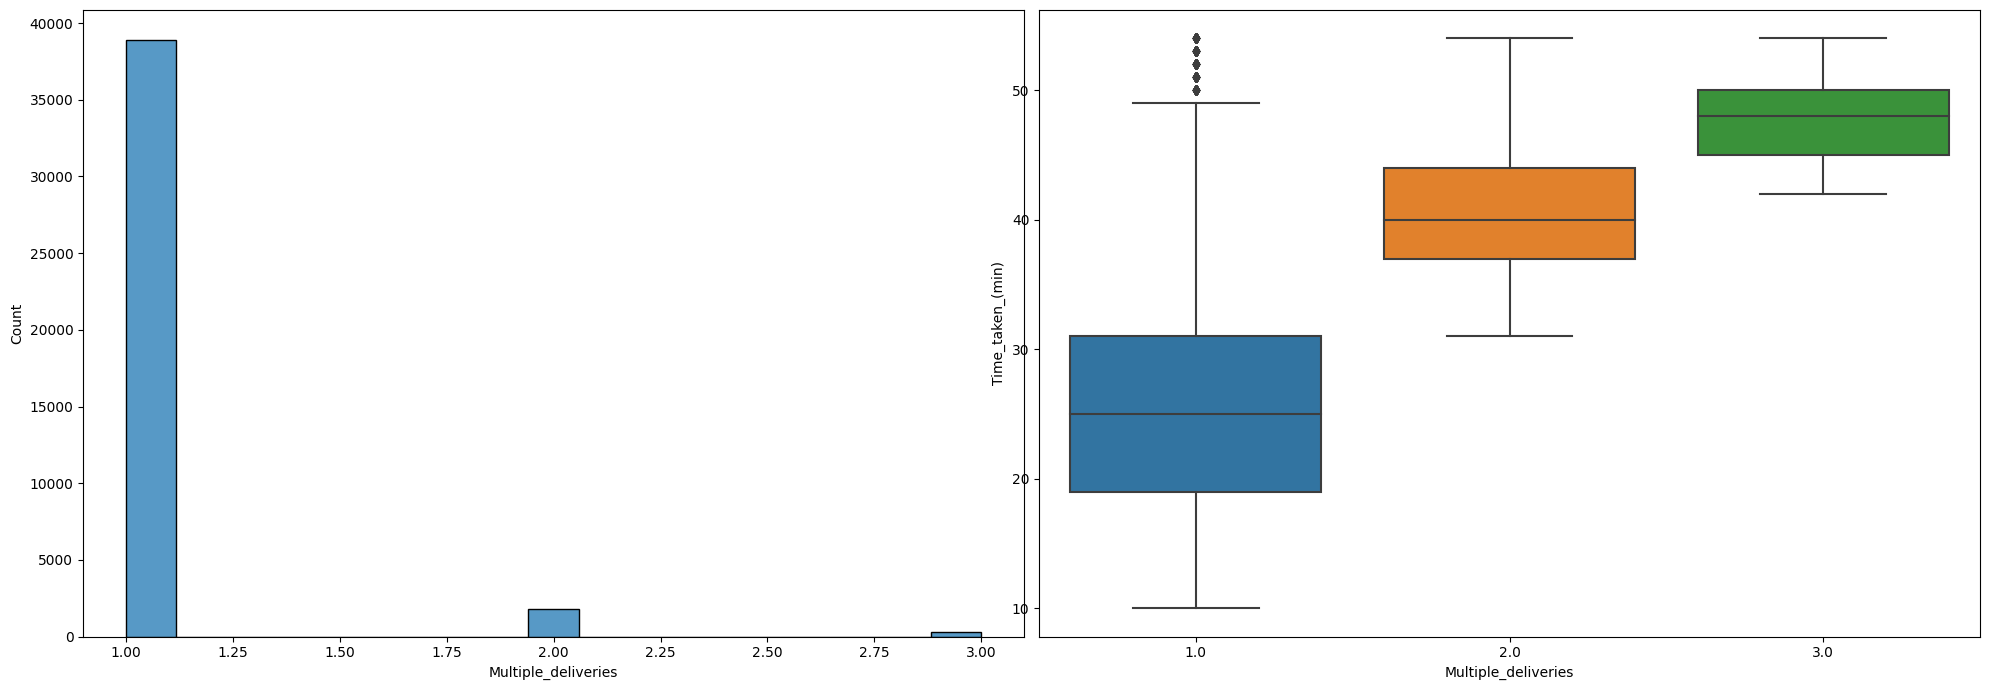

In [518]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.histplot(data = EDA_data, x = 'Multiple_deliveries')
plt.tight_layout()
plt.subplot(1,2,2)
sns.boxplot(data = EDA_data, x = 'Multiple_deliveries', y = 'Time_taken_(min)')
#----------------------------------------------------------------------
from scipy.stats import f_oneway
print(f_oneway(*EDA_data.groupby('Multiple_deliveries')['Time_taken_(min)'].apply(list)))

oulier

## Festival

In [519]:
EDA_data['Festival'].value_counts()

No     40234
Yes      802
Name: Festival, dtype: int64

F_onewayResult(statistic=3707.340467162782, pvalue=0.0)


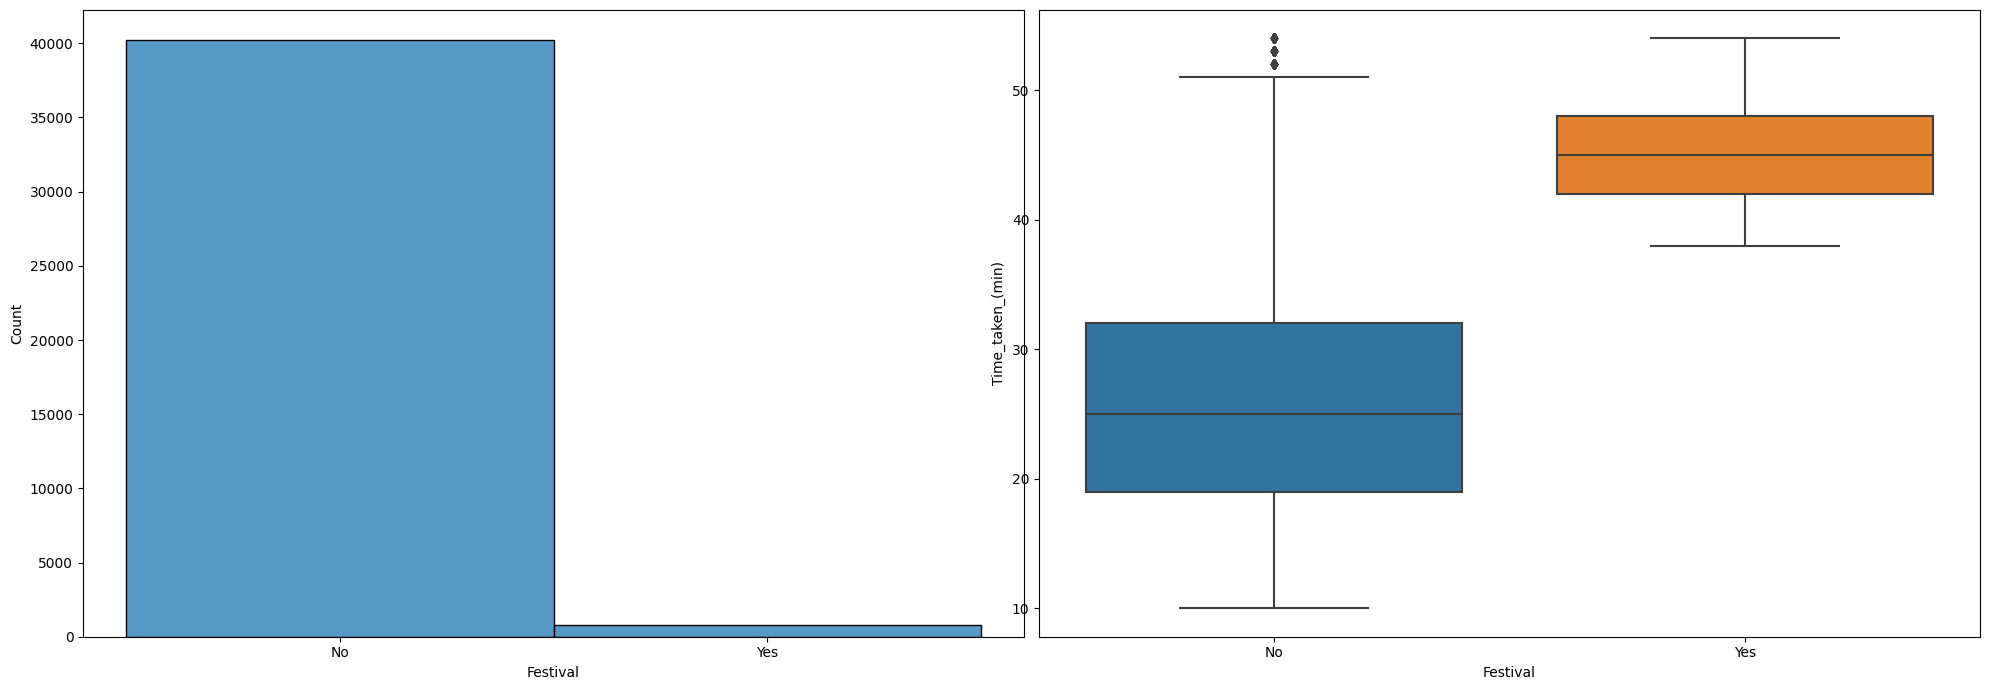

In [520]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.histplot(data = EDA_data, x = 'Festival')
plt.tight_layout()
plt.subplot(1,2,2)
sns.boxplot(data = EDA_data, x = 'Festival', y = 'Time_taken_(min)')
#----------------------------------------------------------------------
from scipy.stats import f_oneway
print(f_oneway(*EDA_data.groupby('Festival')['Time_taken_(min)'].apply(list)))

**Festival vô dụng**
-   Festival = Yes là oulier. Vì chỉ 2 value nên xem như không có giá trị

## City

In [521]:
EDA_data['City'].value_counts()

Metropolitian    30754
Urban            10136
Semi-Urban         146
Name: City, dtype: int64

F_onewayResult(statistic=1375.1968437847136, pvalue=0.0)


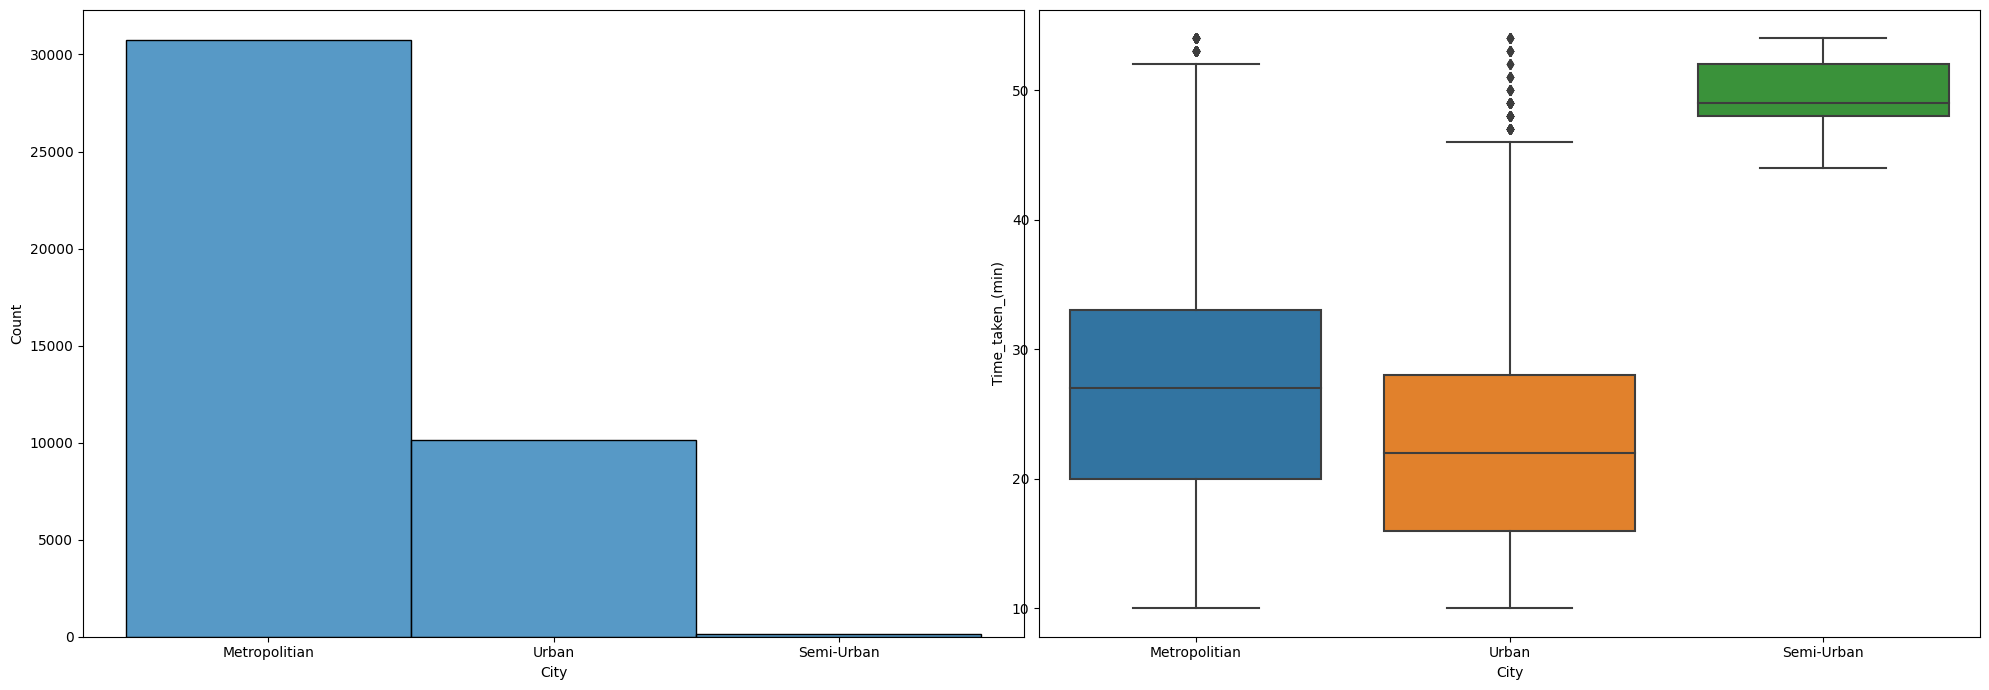

In [522]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.histplot(data = EDA_data, x = 'City')
plt.tight_layout()
plt.subplot(1,2,2)
sns.boxplot(data = EDA_data, x = 'City', y = 'Time_taken_(min)')
#----------------------------------------------------------------------
from scipy.stats import f_oneway
print(f_oneway(*EDA_data.groupby('City')['Time_taken_(min)'].apply(list)))

F_onewayResult(statistic=1774.136915879361, pvalue=0.0)


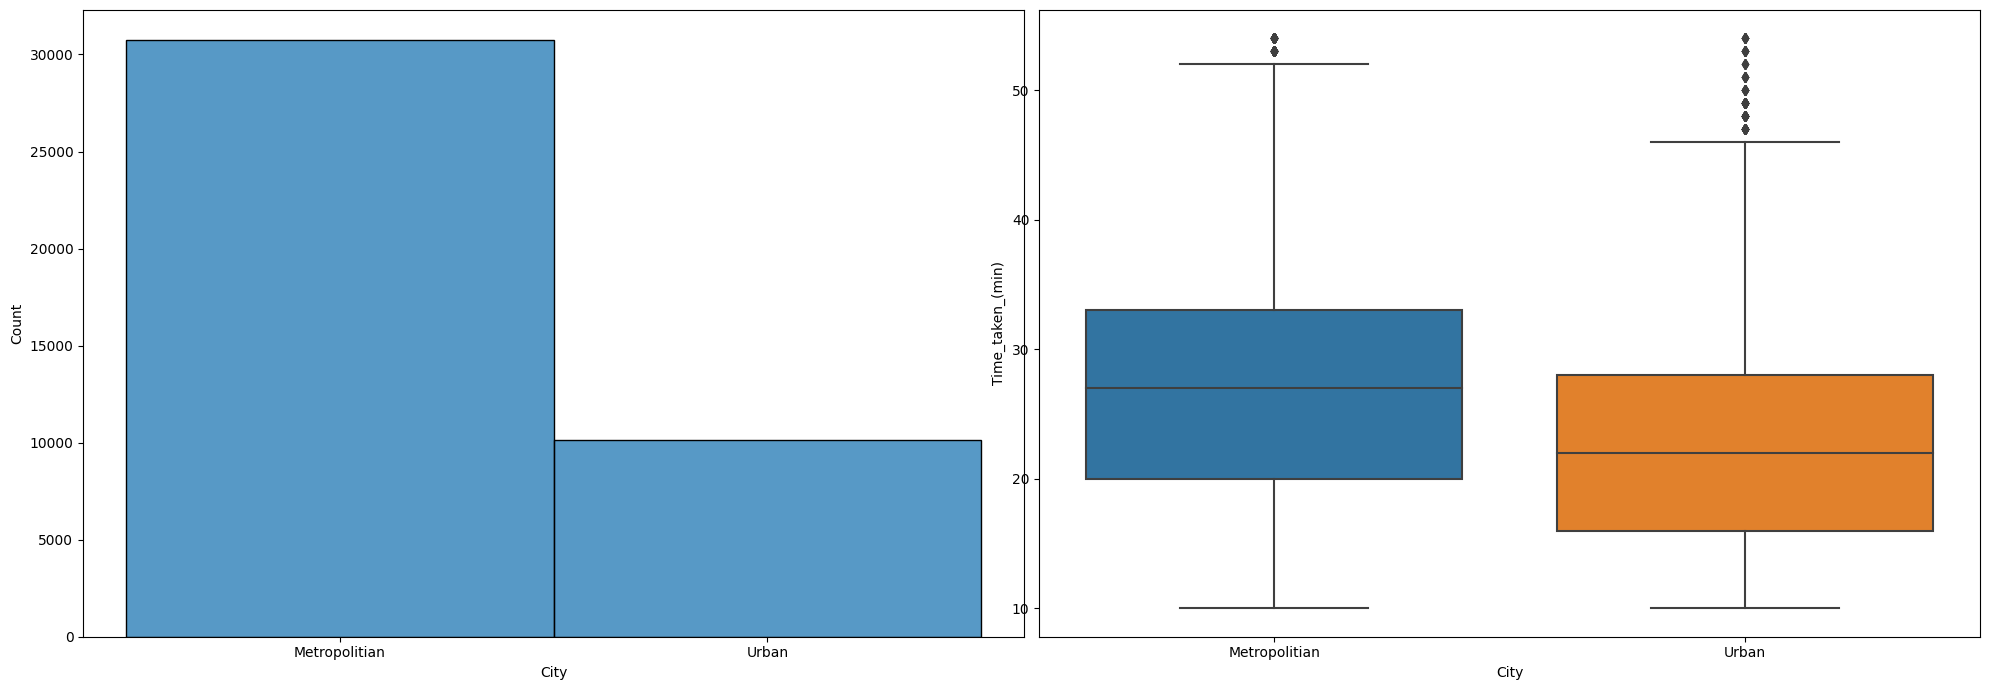

In [523]:
EDA_data = EDA_data[EDA_data['City'] != 'Semi-Urban']
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.histplot(data = EDA_data, x = 'City')
plt.tight_layout()
plt.subplot(1,2,2)
sns.boxplot(data = EDA_data, x = 'City', y = 'Time_taken_(min)')
#----------------------------------------------------------------------
from scipy.stats import f_oneway
print(f_oneway(*EDA_data.groupby('City')['Time_taken_(min)'].apply(list)))

In [524]:
EDA_data.groupby('City')['Time_taken_(min)'].apply(list)

City
Metropolitian    [25.0, 40.0, 11.0, 47.0, 15.0, 31.0, 20.0, 29....
Urban            [30.0, 19.0, 18.0, 12.0, 11.0, 38.0, 24.0, 34....
Name: Time_taken_(min), dtype: object

## Hour_order

In [525]:
EDA_data['Hour_order'].value_counts()

21    4346
22    4274
19    4270
20    4218
18    4198
23    4189
17    4008
10    1854
11    1822
9     1817
8     1713
12     836
15     816
14     739
13     728
16     659
0      403
Name: Hour_order, dtype: int64

F_onewayResult(statistic=577.3725844776966, pvalue=0.0)


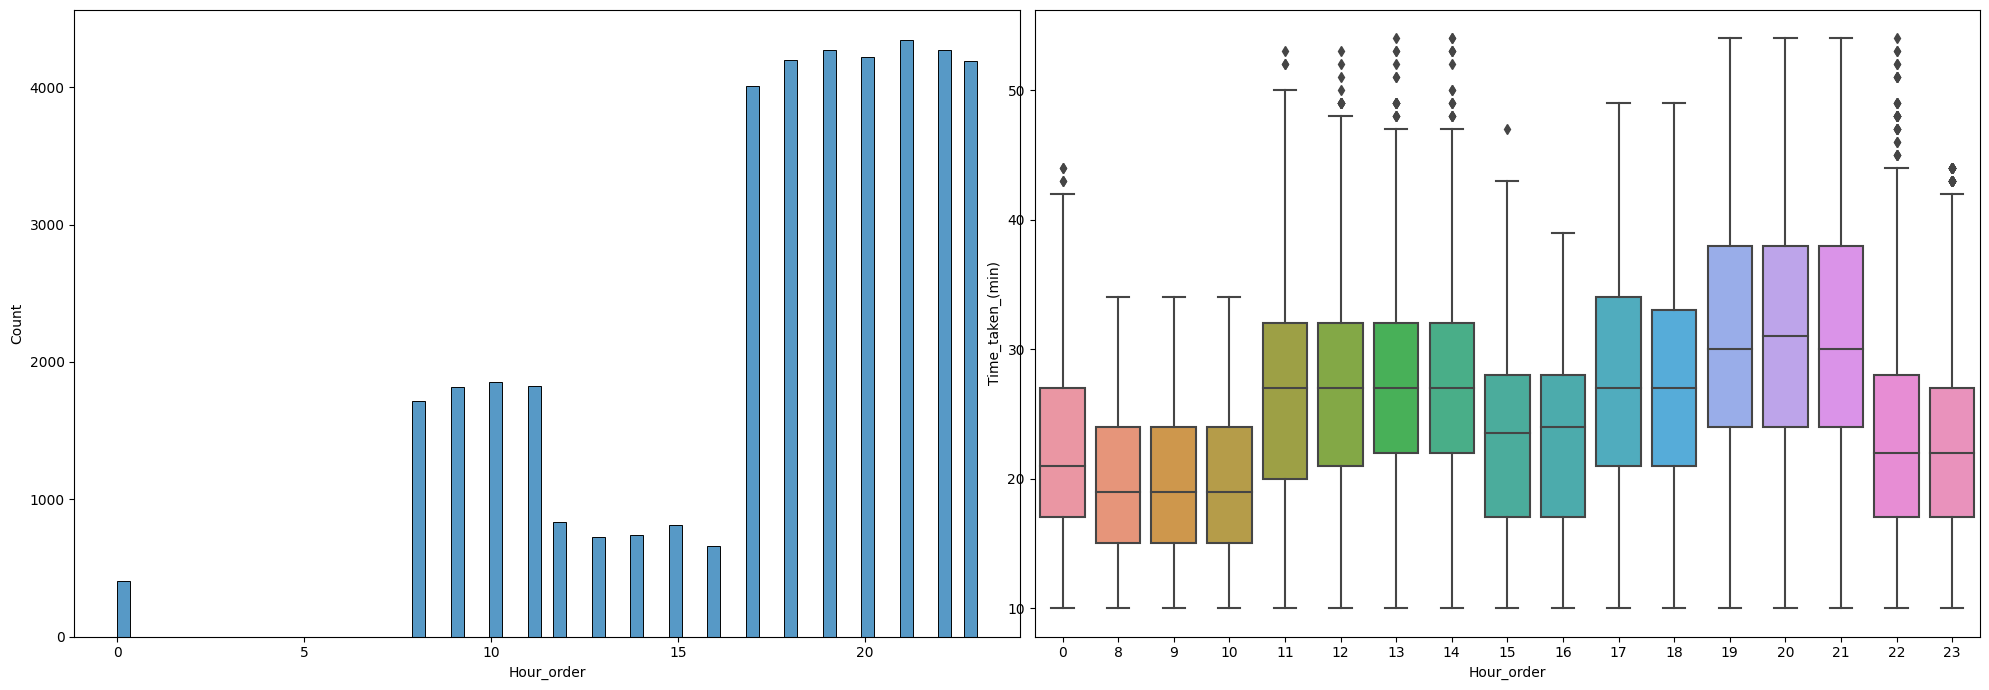

In [526]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.histplot(data = EDA_data, x = 'Hour_order')
plt.tight_layout()
plt.subplot(1,2,2)
sns.boxplot(data = EDA_data, x = 'Hour_order', y = 'Time_taken_(min)')
#----------------------------------------------------------------------
from scipy.stats import f_oneway
print(f_oneway(*EDA_data.groupby('Hour_order')['Time_taken_(min)'].apply(list)))

**Nhân xét**: thời gian đặt đồ ăn cao điểm từ 16 -> 22

## Hour_picked

## WeekDay

In [527]:
EDA_data['WeekDay'].value_counts()

2    6371
4    6228
3    5711
1    5706
5    5703
6    5586
0    5585
Name: WeekDay, dtype: int64

F_onewayResult(statistic=46.80230185433641, pvalue=1.6771522753973076e-57)


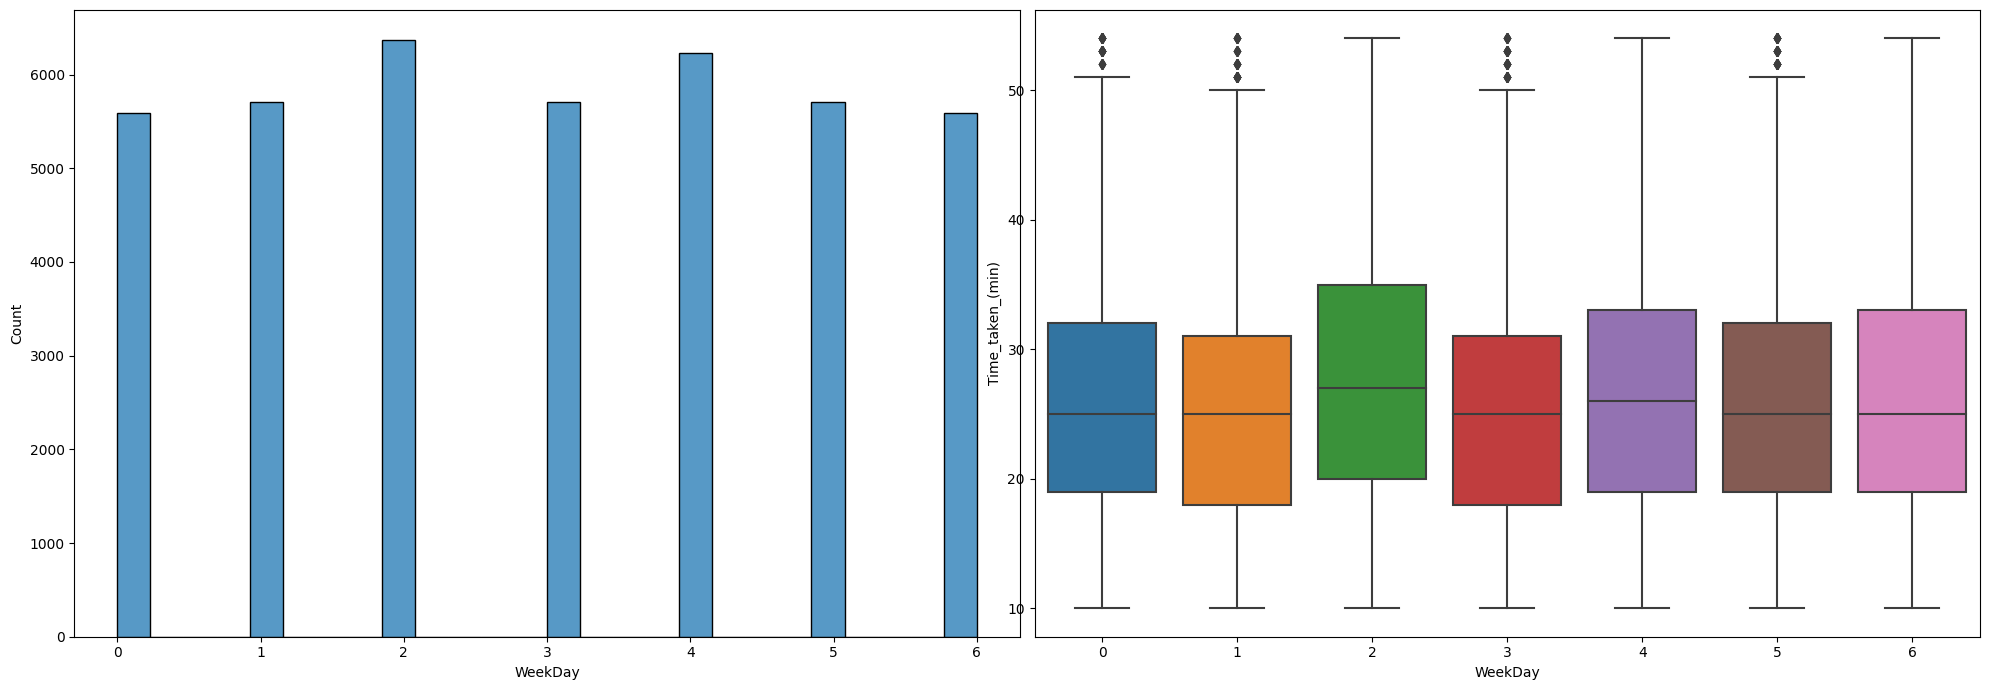

In [528]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.histplot(data = EDA_data, x = 'WeekDay')
plt.tight_layout()
plt.subplot(1,2,2)
sns.boxplot(data = EDA_data, x = 'WeekDay', y = 'Time_taken_(min)')
#----------------------------------------------------------------------
from scipy.stats import f_oneway
print(f_oneway(*EDA_data.groupby('WeekDay')['Time_taken_(min)'].apply(list)))

In [529]:
EDA_data.groupby('WeekDay')['Time_taken_(min)'].apply(list)

WeekDay
0    [20.0, 28.0, 15.0, 39.0, 35.0, 36.0, 27.0, 18....
1    [15.0, 22.0, 12.0, 28.0, 26.0, 19.0, 20.0, 25....
2    [34.0, 30.0, 11.0, 16.0, 38.0, 28.0, 17.0, 38....
3    [25.0, 11.0, 47.0, 37.0, 11.0, 38.0, 23.0, 15....
4    [40.0, 18.0, 20.0, 26.0, 28.0, 34.0, 23.0, 16....
5    [30.0, 29.0, 30.0, 24.0, 27.0, 27.0, 11.0, 26....
6    [19.0, 31.0, 32.0, 29.0, 33.0, 38.0, 12.0, 40....
Name: Time_taken_(min), dtype: object

In [530]:
# Cuoi tuan
Weekend =      EDA_data.groupby('WeekDay')['Time_taken_(min)'].apply(list)[5]
Weekend.append(EDA_data.groupby('WeekDay')['Time_taken_(min)'].apply(list)[6])
# Ngay thuon
Weekday =      EDA_data.groupby('WeekDay')['Time_taken_(min)'].apply(list)[0]
Weekday.append(EDA_data.groupby('WeekDay')['Time_taken_(min)'].apply(list)[1])
Weekday.append(EDA_data.groupby('WeekDay')['Time_taken_(min)'].apply(list)[2])
Weekday.append(EDA_data.groupby('WeekDay')['Time_taken_(min)'].apply(list)[3])
Weekday.append(EDA_data.groupby('WeekDay')['Time_taken_(min)'].apply(list)[4])

In [531]:
f_oneway(EDA_data.groupby('WeekDay')['Time_taken_(min)'].apply(list)[5],EDA_data.groupby('WeekDay')['Time_taken_(min)'].apply(list)[6])

F_onewayResult(statistic=7.515556076977992, pvalue=0.006126470868873969)

In [532]:
f_oneway(EDA_data.groupby('WeekDay')['Time_taken_(min)'].apply(list)[0],
         EDA_data.groupby('WeekDay')['Time_taken_(min)'].apply(list)[1],
         EDA_data.groupby('WeekDay')['Time_taken_(min)'].apply(list)[2],
         EDA_data.groupby('WeekDay')['Time_taken_(min)'].apply(list)[3],
         EDA_data.groupby('WeekDay')['Time_taken_(min)'].apply(list)[4])

F_onewayResult(statistic=67.8137488392572, pvalue=3.1449978989941497e-57)

In [533]:
data_gb = EDA_data[["WeekDay", "Hour_order","Time_taken_(min)"]]
data_groupby = data_gb.groupby(["WeekDay", "Hour_order"], as_index=False).count()
data_pivot = data_groupby.pivot(index="Hour_order", columns="WeekDay")
data_pivot

Time_taken_(min)                              
WeekDay                   0    1    2    3    4    5    6
Hour_order                                               
0                        48   50   60   72   68   65   40
8                       256  303  139  331  213  242  229
9                       239  332  198  290  268  254  236
10                      266  325  162  317  250  287  247
11                      275  341  163  351  211  253  228
12                      118  141   91  127  114  132  113
13                      103  140   78  118   91  108   90
14                      111  132   81  133   97   95   90
15                      124  139   59  175   88  108  123
16                       90  120   62  114   93  101   79
17                      532  488  716  515  663  574  520
18                      552  546  732  529  685  548  606
19                      602  544  764  489  712  552  607
20                      555  522  807  527  658  582  567
21                      590  513  770  561  683  625  604
22                      551  563  737  528  692  619  584
23                      573  507  752  534  642  558  623

## Day of month

In [534]:
EDA_data['Day of month'].value_counts().sort_values()

22      12
23     864
31     873
27     877
8      878
29     887
20     896
10     901
25     901
28    1047
21    1053
30    1054
7     1062
9     1067
19    1068
24    1073
26    1079
14    1567
18    1572
12    1579
16    1593
4     1758
6     1772
17    1789
11    1811
2     1827
13    1828
15    1833
1     2087
5     2135
3     2147
Name: Day of month, dtype: int64

F_onewayResult(statistic=184.96369585801912, pvalue=0.0)


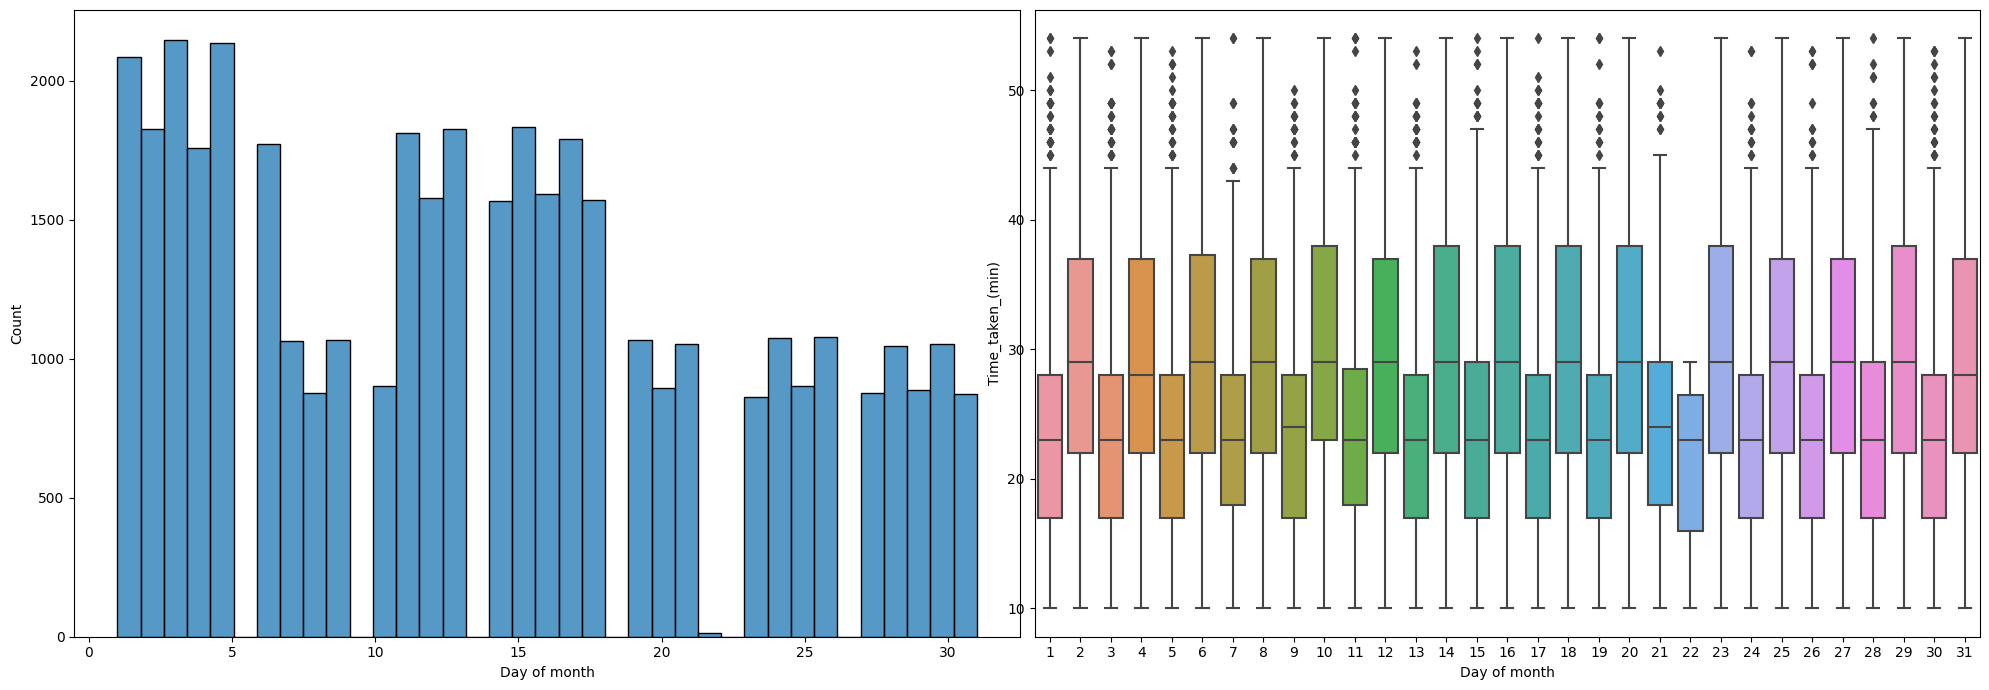

In [535]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.histplot(data = EDA_data, x = 'Day of month')
plt.tight_layout()
plt.subplot(1,2,2)
sns.boxplot(data = EDA_data, x = 'Day of month', y = 'Time_taken_(min)')
#----------------------------------------------------------------------
from scipy.stats import f_oneway
print(f_oneway(*EDA_data.groupby('Day of month')['Time_taken_(min)'].apply(list)))

**Nhân xét** Những ngày đầu tháng số lượng đặt hàng đồ ăn cao hơn cuối tháng
- Lí do:............ 

In [536]:
data_gb = EDA_data[["WeekDay", "Day of month","Time_taken_(min)"]]
data_groupby = data_gb.groupby(["WeekDay", "Day of month"], as_index=False).count()
data_pivot = data_groupby.pivot(index="Day of month", columns="WeekDay")
data_pivot

Time_taken_(min)                                                
WeekDay                     0       1       2       3       4       5       6
Day of month                                                                 
1                         NaN  1033.0     NaN     NaN  1054.0     NaN     NaN
2                         NaN     NaN   922.0     NaN     NaN   905.0     NaN
3                         NaN     NaN     NaN  1063.0     NaN     NaN  1084.0
4                       868.0     NaN     NaN     NaN   890.0     NaN     NaN
5                         NaN  1063.0     NaN     NaN     NaN  1072.0     NaN
6                         NaN     NaN   871.0     NaN     NaN     NaN   901.0
7                      1050.0     NaN     NaN    12.0     NaN     NaN     NaN
8                         NaN   878.0     NaN     NaN     NaN     NaN     NaN
9                         NaN     NaN  1067.0     NaN     NaN     NaN     NaN
10                        NaN     NaN     NaN   901.0     NaN     NaN     NaN
11                        NaN     NaN     NaN     NaN  1811.0     NaN     NaN
12                        NaN     NaN     NaN     NaN     NaN  1579.0     NaN
13                        NaN     NaN     NaN     NaN     NaN     NaN  1828.0
14                     1567.0     NaN     NaN     NaN     NaN     NaN     NaN
15                        NaN  1833.0     NaN     NaN     NaN     NaN     NaN
16                        NaN     NaN  1593.0     NaN     NaN     NaN     NaN
17                        NaN     NaN     NaN  1789.0     NaN     NaN     NaN
18                        NaN     NaN     NaN     NaN  1572.0     NaN     NaN
19                        NaN     NaN     NaN     NaN     NaN  1068.0     NaN
20                        NaN     NaN     NaN     NaN     NaN     NaN   896.0
21                     1053.0     NaN     NaN     NaN     NaN     NaN     NaN
22                        NaN    12.0     NaN     NaN     NaN     NaN     NaN
23                        NaN     NaN   864.0     NaN     NaN     NaN     NaN
24                        NaN     NaN     NaN  1073.0     NaN     NaN     NaN
25                        NaN     NaN     NaN     NaN   901.0     NaN     NaN
26                        NaN     NaN     NaN     NaN     NaN  1079.0     NaN
27                        NaN     NaN     NaN     NaN     NaN     NaN   877.0
28                     1047.0     NaN     NaN     NaN     NaN     NaN     NaN
29                        NaN   887.0     NaN     NaN     NaN     NaN     NaN
30                        NaN     NaN  1054.0     NaN     NaN     NaN     NaN
31                        NaN     NaN     NaN   873.0     NaN     NaN     NaN

In [537]:
data_gb = EDA_data[["WeekDay", "Day of month","Time_taken_(min)"]]
data_groupby = data_gb.groupby(["WeekDay", "Day of month"], as_index=False).mean()
data_pivot = data_groupby.pivot(index="Day of month", columns="WeekDay")
data_pivot['Total'] = data_pivot.mean(axis = 1)
data_pivot.sort_values(by= 'Total')

Time_taken_(min)                                              \
WeekDay                     0          1          2          3          4   
Day of month                                                                
22                        NaN  21.166667        NaN        NaN        NaN   
24                        NaN        NaN        NaN  22.962721        NaN   
19                        NaN        NaN        NaN        NaN        NaN   
26                        NaN        NaN        NaN        NaN        NaN   
5                         NaN  23.285983        NaN        NaN        NaN   
3                         NaN        NaN        NaN  23.174036        NaN   
1                         NaN  23.256534        NaN        NaN  23.176471   
13                        NaN        NaN        NaN        NaN        NaN   
15                        NaN  23.428260        NaN        NaN        NaN   
30                        NaN        NaN  23.449715        NaN        NaN   
17                        NaN        NaN        NaN  23.456121        NaN   
28                  23.458453        NaN        NaN        NaN        NaN   
9                         NaN        NaN  23.462043        NaN        NaN   
11                        NaN        NaN        NaN        NaN  23.510215   
21                  23.657170        NaN        NaN        NaN        NaN   
7                   23.147619        NaN        NaN  25.750000        NaN   
27                        NaN        NaN        NaN        NaN        NaN   
4                   29.261521        NaN        NaN        NaN  29.368539   
31                        NaN        NaN        NaN  29.333333        NaN   
25                        NaN        NaN        NaN        NaN  29.451720   
12                        NaN        NaN        NaN        NaN        NaN   
2                         NaN        NaN  29.390456        NaN        NaN   
6                         NaN        NaN  29.451206        NaN        NaN   
16                        NaN        NaN  29.821092        NaN        NaN   
8                         NaN  29.858770        NaN        NaN        NaN   
18                        NaN        NaN        NaN        NaN  29.911578   
23                        NaN        NaN  29.952546        NaN        NaN   
20                        NaN        NaN        NaN        NaN        NaN   
29                        NaN  30.029312        NaN        NaN        NaN   
14                  30.047224        NaN        NaN        NaN        NaN   
10                        NaN        NaN        NaN  30.112098        NaN   

                                        Total  
WeekDay               5          6             
Day of month                                   
22                  NaN        NaN  21.166667  
24                  NaN        NaN  22.962721  
19            22.985955        NaN  22.985955  
26            23.109361        NaN  23.109361  
5             23.027985        NaN  23.156984  
3                   NaN  23.144834  23.159435  
1                   NaN        NaN  23.216502  
13                  NaN  23.239606  23.239606  
15                  NaN        NaN  23.428260  
30                  NaN        NaN  23.449715  
17                  NaN        NaN  23.456121  
28                  NaN        NaN  23.458453  
9                   NaN        NaN  23.462043  
11                  NaN        NaN  23.510215  
21                  NaN        NaN  23.657170  
7                   NaN        NaN  24.448810  
27                  NaN  29.291904  29.291904  
4                   NaN        NaN  29.315030  
31                  NaN        NaN  29.333333  
25                  NaN        NaN  29.451720  
12            29.492717        NaN  29.492717  
2             29.751381        NaN  29.570918  
6                   NaN  30.159822  29.805514  
16                  NaN        NaN  29.821092  
8                   NaN        NaN  29.858770  
18                  NaN        NaN  29.911578  
23

In [538]:
data_gb = EDA_data[["WeekDay", "Day of month","Time_taken_(min)"]]
data_groupby = data_gb.groupby(["WeekDay", "Day of month"], as_index=False).mean()
data_pivot = data_groupby.pivot(index="Day of month", columns="WeekDay")
data_pivot['Mean'] = data_pivot.mean(axis = 1)
data_pivot

Time_taken_(min)                                              \
WeekDay                     0          1          2          3          4   
Day of month                                                                
1                         NaN  23.256534        NaN        NaN  23.176471   
2                         NaN        NaN  29.390456        NaN        NaN   
3                         NaN        NaN        NaN  23.174036        NaN   
4                   29.261521        NaN        NaN        NaN  29.368539   
5                         NaN  23.285983        NaN        NaN        NaN   
6                         NaN        NaN  29.451206        NaN        NaN   
7                   23.147619        NaN        NaN  25.750000        NaN   
8                         NaN  29.858770        NaN        NaN        NaN   
9                         NaN        NaN  23.462043        NaN        NaN   
10                        NaN        NaN        NaN  30.112098        NaN   
11                        NaN        NaN        NaN        NaN  23.510215   
12                        NaN        NaN        NaN        NaN        NaN   
13                        NaN        NaN        NaN        NaN        NaN   
14                  30.047224        NaN        NaN        NaN        NaN   
15                        NaN  23.428260        NaN        NaN        NaN   
16                        NaN        NaN  29.821092        NaN        NaN   
17                        NaN        NaN        NaN  23.456121        NaN   
18                        NaN        NaN        NaN        NaN  29.911578   
19                        NaN        NaN        NaN        NaN        NaN   
20                        NaN        NaN        NaN        NaN        NaN   
21                  23.657170        NaN        NaN        NaN        NaN   
22                        NaN  21.166667        NaN        NaN        NaN   
23                        NaN        NaN  29.952546        NaN        NaN   
24                        NaN        NaN        NaN  22.962721        NaN   
25                        NaN        NaN        NaN        NaN  29.451720   
26                        NaN        NaN        NaN        NaN        NaN   
27                        NaN        NaN        NaN        NaN        NaN   
28                  23.458453        NaN        NaN        NaN        NaN   
29                        NaN  30.029312        NaN        NaN        NaN   
30                        NaN        NaN  23.449715        NaN        NaN   
31                        NaN        NaN        NaN  29.333333        NaN   

                                         Mean  
WeekDay               5          6             
Day of month                                   
1                   NaN        NaN  23.216502  
2             29.751381        NaN  29.570918  
3                   NaN  23.144834  23.159435  
4                   NaN        NaN  29.315030  
5             23.027985        NaN  23.156984  
6                   NaN  30.159822  29.805514  
7                   NaN        NaN  24.448810  
8                   NaN        NaN  29.858770  
9                   NaN        NaN  23.462043  
10                  NaN        NaN  30.112098  
11                  NaN        NaN  23.510215  
12            29.492717        NaN  29.492717  
13                  NaN  23.239606  23.239606  
14                  NaN        NaN  30.047224  
15                  NaN        NaN  23.428260  
16                  NaN        NaN  29.821092  
17                  NaN        NaN  23.456121  
18                  NaN        NaN  29.911578  
19            22.985955        NaN  22.985955  
20                  NaN  29.991071  29.991071  
21                  NaN        NaN  23.657170  
22                  NaN        NaN  21.166667  
23                  NaN        NaN  29.952546  
24                  NaN        NaN  22.962721  
25                  NaN        NaN  29.451720  
26            23.109361        NaN  23.109361  
27

In [539]:
data_pivot

Time_taken_(min)                                              \
WeekDay                     0          1          2          3          4   
Day of month                                                                
1                         NaN  23.256534        NaN        NaN  23.176471   
2                         NaN        NaN  29.390456        NaN        NaN   
3                         NaN        NaN        NaN  23.174036        NaN   
4                   29.261521        NaN        NaN        NaN  29.368539   
5                         NaN  23.285983        NaN        NaN        NaN   
6                         NaN        NaN  29.451206        NaN        NaN   
7                   23.147619        NaN        NaN  25.750000        NaN   
8                         NaN  29.858770        NaN        NaN        NaN   
9                         NaN        NaN  23.462043        NaN        NaN   
10                        NaN        NaN        NaN  30.112098        NaN   
11                        NaN        NaN        NaN        NaN  23.510215   
12                        NaN        NaN        NaN        NaN        NaN   
13                        NaN        NaN        NaN        NaN        NaN   
14                  30.047224        NaN        NaN        NaN        NaN   
15                        NaN  23.428260        NaN        NaN        NaN   
16                        NaN        NaN  29.821092        NaN        NaN   
17                        NaN        NaN        NaN  23.456121        NaN   
18                        NaN        NaN        NaN        NaN  29.911578   
19                        NaN        NaN        NaN        NaN        NaN   
20                        NaN        NaN        NaN        NaN        NaN   
21                  23.657170        NaN        NaN        NaN        NaN   
22                        NaN  21.166667        NaN        NaN        NaN   
23                        NaN        NaN  29.952546        NaN        NaN   
24                        NaN        NaN        NaN  22.962721        NaN   
25                        NaN        NaN        NaN        NaN  29.451720   
26                        NaN        NaN        NaN        NaN        NaN   
27                        NaN        NaN        NaN        NaN        NaN   
28                  23.458453        NaN        NaN        NaN        NaN   
29                        NaN  30.029312        NaN        NaN        NaN   
30                        NaN        NaN  23.449715        NaN        NaN   
31                        NaN        NaN        NaN  29.333333        NaN   

                                         Mean  
WeekDay               5          6             
Day of month                                   
1                   NaN        NaN  23.216502  
2             29.751381        NaN  29.570918  
3                   NaN  23.144834  23.159435  
4                   NaN        NaN  29.315030  
5             23.027985        NaN  23.156984  
6                   NaN  30.159822  29.805514  
7                   NaN        NaN  24.448810  
8                   NaN        NaN  29.858770  
9                   NaN        NaN  23.462043  
10                  NaN        NaN  30.112098  
11                  NaN        NaN  23.510215  
12            29.492717        NaN  29.492717  
13                  NaN  23.239606  23.239606  
14                  NaN        NaN  30.047224  
15                  NaN        NaN  23.428260  
16                  NaN        NaN  29.821092  
17                  NaN        NaN  23.456121  
18                  NaN        NaN  29.911578  
19            22.985955        NaN  22.985955  
20                  NaN  29.991071  29.991071  
21                  NaN        NaN  23.657170  
22                  NaN        NaN  21.166667  
23                  NaN        NaN  29.952546  
24                  NaN        NaN  22.962721  
25                  NaN        NaN  29.451720  
26            23.109361        NaN  23.109361  
27

In [540]:
data_gb = EDA_data[["Road_traffic_density", "Hour_order","Time_taken_(min)"]]
data_groupby = data_gb.groupby(["Road_traffic_density", "Hour_order"], as_index=False).mean()
data_pivot = data_groupby.pivot(index="Hour_order", columns="Road_traffic_density")
data_pivot

Time_taken_(min)                                 
Road_traffic_density             High        Jam        Low     Medium
Hour_order                                                            
0                                 NaN        NaN  22.042184        NaN
8                                 NaN        NaN  19.650905        NaN
9                                 NaN        NaN  19.518437        NaN
10                                NaN        NaN  19.495146        NaN
11                          27.121341        NaN  19.489011        NaN
12                          26.789222        NaN        NaN  30.000000
13                          27.454670        NaN        NaN        NaN
14                          27.354533        NaN        NaN        NaN
15                          26.086420        NaN        NaN  22.986395
16                                NaN        NaN        NaN  22.965099
17                                NaN        NaN        NaN  27.439371
18                                NaN        NaN        NaN  27.229871
19                                NaN  31.059462        NaN  27.216418
20                                NaN  31.017781        NaN        NaN
21                                NaN  30.945927        NaN        NaN
22                                NaN  31.394667  22.427655  19.000000
23                                NaN        NaN  22.462640        NaN

In [541]:
# Thời lượng giao hàng trung bình 
data_gb = EDA_data[["Road_traffic_density", "Hour_order","Time_taken_(min)"]]
data_groupby = data_gb.groupby(["Road_traffic_density", "Hour_order"], as_index=False).mean()
data_pivot = data_groupby.pivot(index="Hour_order", columns="Road_traffic_density")
data_pivot['Time'] = data_pivot.mean(axis = 1)
data_pivot.corr()

Time_taken_(min)                      \
Road_traffic_density                              High       Jam       Low   
                 Road_traffic_density                                        
Time_taken_(min) High                         1.000000       NaN       NaN   
                 Jam                               NaN  1.000000       NaN   
                 Low                               NaN       NaN  1.000000   
                 Medium                       1.000000 -1.000000       NaN   
Time                                          0.351894 -0.983581  0.662487   

                                                     Time  
Road_traffic_density                     Medium            
                 Road_traffic_density                      
Time_taken_(min) High                  1.000000  0.351894  
                 Jam                  -1.000000 -0.983581  
                 Low                        NaN  0.662487  
                 Medium                1.000000  0.836447  
Time                                   0.836447  1.000000

* Số lượng đặt hàng ban đêm cao honw nên thời gian giao cao hơn
* Thời gian đặt hàng hợp lý: 0h -> 15h

In [542]:
EDA_data

,Delivery_person_Age,Delivery_person_ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,Multiple_deliveries,Festival,City,Distance,Time_taken_(min),Hour_order,Hour_picked,WeekDay,Day of month
0,36.0,4,23.351058,85.325731,23.371058,85.345731,Cloudy,High,1,Drinks,motorcycle,1.0,No,Metropolitian,3.018911,25.0,11,11,3,24
1,37.0,4,12.934365,77.616155,13.024365,77.706155,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian,13.973178,40.0,17,17,4,25
2,25.0,4,22.312790,73.170283,22.352790,73.210283,Cloudy,High,1,Drinks,scooter,1.0,No,Urban,6.058825,30.0,13,13,5,19
3,28.0,4,17.433809,78.386744,17.563809,78.516744,Sandstorms,Low,1,Drinks,motorcycle,1.0,No,Metropolitian,19.975520,11.0,23,23,3,10
4,22.0,4,12.310972,76.659264,12.390972,76.739264,Fog,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,12.435540,47.0,20,20,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41057,26.0,4,30.899992,75.831338,30.909992,75.841338,Cloudy,Low,0,Drinks,motorcycle,1.0,No,Metropolitian,1.465159,21.0,10,10,4,11
41058,28.0,4,26.891191,75.802083,26.911191,75.822083,Stormy,Low,2,Snack,scooter,1.0,No,Metropolitian,2.979763,18.0,9,9,1,15
41059,30.0,3,15.561295,73.749478,15.651295,73.839478,Fog,Low,1,Drinks,scooter,1.0,No,Urban,13.894367,35.0,23,23,5,12
41060,20.0,4,26.477750,80.351569,26.547750,80.421569,Sandstorms,Low,0,Snack,motorcycle,1.0,No,Metropolitian,10.444972,18.0,23,23,4,18


In [543]:
ANV_data = EDA_data
del ANV_data['Restaurant_latitude']
del ANV_data['Restaurant_longitude']
del ANV_data['Delivery_location_latitude']
del ANV_data['Delivery_location_longitude']
del ANV_data['Festival']
del ANV_data['Hour_picked']
ANV_data['Time'] = EDA_data['Time_taken_(min)']
del ANV_data['Time_taken_(min)']
ANV_data

,Delivery_person_Age,Delivery_person_ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,Multiple_deliveries,City,Distance,Hour_order,WeekDay,Day of month,Time
0,36.0,4,Cloudy,High,1,Drinks,motorcycle,1.0,Metropolitian,3.018911,11,3,24,25.0
1,37.0,4,Fog,Medium,1,Meal,scooter,1.0,Metropolitian,13.973178,17,4,25,40.0
2,25.0,4,Cloudy,High,1,Drinks,scooter,1.0,Urban,6.058825,13,5,19,30.0
3,28.0,4,Sandstorms,Low,1,Drinks,motorcycle,1.0,Metropolitian,19.975520,23,3,10,11.0
4,22.0,4,Fog,Jam,0,Snack,motorcycle,1.0,Metropolitian,12.435540,20,3,10,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41057,26.0,4,Cloudy,Low,0,Drinks,motorcycle,1.0,Metropolitian,1.465159,10,4,11,21.0
41058,28.0,4,Stormy,Low,2,Snack,scooter,1.0,Metropolitian,2.979763,9,1,15,18.0
41059,30.0,3,Fog,Low,1,Drinks,scooter,1.0,Urban,13.894367,23,5,12,35.0
41060,20.0,4,Sandstorms,Low,0,Snack,motorcycle,1.0,Metropolitian,10.444972,23,4,18,18.0


In [554]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('Time ~ C(Delivery_person_Age) + C(Weather_conditions) + C(Delivery_person_Age):C(Weather_conditions)', data=ANV_data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Delivery_person_Age),4.172870e+05,19.0,320.215428,0.000000e+00
C(Weather_conditions),2.334478e+05,5.0,680.739348,0.000000e+00
C(Delivery_person_Age):C(Weather_conditions),8.788930e+04,95.0,13.488804,2.448213e-203
Residual,2.796274e+06,40770.0,NaN,NaN


In [594]:
# Thời lượng giao hàng trung bình 
data_gb = EDA_data[["Road_traffic_density", "Type_of_vehicle","Time"]]
data_groupby = data_gb.groupby(["Road_traffic_density", "Type_of_vehicle"], as_index=False).mean()
data_pivot = data_groupby.pivot(index="Type_of_vehicle", columns="Road_traffic_density")
data_pivot['Time_taken_(min)'] = data_pivot.mean(axis=1)
data_pivot.sort_values(by = 'Time_taken_(min)')

Time                                   \
Road_traffic_density       High        Jam        Low     Medium   
Type_of_vehicle                                                    
scooter               25.015060  28.716698  20.010768  24.959193   
motorcycle            28.623783  32.688688  22.173777  27.976533   

                     Time_taken_(min)  
Road_traffic_density                   
Type_of_vehicle                        
scooter                     24.675430  
motorcycle                  27.865695

In [587]:
EDA_data[['Delivery_person_ratings','Time']].groupby('Delivery_person_ratings').mean()

,Time
Delivery_person_ratings,
2,37.276596
3,37.064889
4,25.949294
5,25.479121


In [556]:
data_pivot.corr()

Time                                          \
Delivery_person_Age           20.0      21.0      22.0      23.0      24.0   
     Delivery_person_Age                                                     
Time 20.0                 1.000000  0.137574 -0.183061  0.492525 -0.360583   
     21.0                 0.137574  1.000000  0.859429  0.573081 -0.209395   
     22.0                -0.183061  0.859429  1.000000  0.419952  0.067875   
     23.0                 0.492525  0.573081  0.419952  1.000000  0.373672   
     24.0                -0.360583 -0.209395  0.067875  0.373672  1.000000   
     25.0                -0.335880 -0.368701 -0.097033 -0.272620  0.288217   
     26.0                -0.201106 -0.271418 -0.478865 -0.111329  0.098905   
     27.0                -0.624153 -0.301456  0.041778  0.074016  0.914554   
     28.0                 0.185667  0.047544 -0.008924  0.411243  0.288269   
     29.0                 0.075438 -0.501459 -0.274410  0.028135  0.477244   
     30.0                -0.114011  0.362493  0.189971 -0.391103 -0.738500   
     31.0                -0.538502 -0.688350 -0.607813 -0.690393  0.079422   
     32.0                -0.592844  0.210517  0.212632  0.061342  0.326976   
     33.0                 0.815324  0.043207 -0.089459  0.159782 -0.469577   
     34.0                 0.466803 -0.347854 -0.184592  0.167588  0.200548   
     35.0                 0.299588  0.580073  0.223488  0.734471  0.079023   
     36.0                -0.485086 -0.773704 -0.674667 -0.857494 -0.086422   
     37.0                 0.544268 -0.186013 -0.472407 -0.410265 -0.884650   
     38.0                 0.922368 -0.009762 -0.160658  0.539589 -0.059012   
     39.0                 0.150683  0.389007  0.265765 -0.023085 -0.503027   

                                                                            \
Delivery_person_Age           25.0      26.0      27.0      28.0      29.0   
     Delivery_person_Age                                                     
Time 20.0                -0.335880 -0.201106 -0.624153  0.185667  0.075438   
     21.0                -0.368701 -0.271418 -0.301456  0.047544 -0.501459   
     22.0                -0.097033 -0.478865  0.041778 -0.008924 -0.274410   
     23.0                -0.272620 -0.111329  0.074016  0.411243  0.028135   
     24.0                 0.288217  0.098905  0.914554  0.288269  0.477244   
     25.0                 1.000000  0.365766  0.569481  0.666262 -0.222127   
     26.0                 0.365766  1.000000  0.279178  0.553375 -0.503368   
     27.0                 0.569481  0.279178  1.000000  0.362724  0.250647   
     28.0                 0.666262  0.553375  0.362724  1.000000 -0.433331   
     29.0                -0.222127 -0.503368  0.250647 -0.433331  1.000000   
     30.0                -0.602098 -0.215199 -0.680329 -0.710705 -0.312739   
     31.0                 0.610623  0.730741  0.396590  0.215624 -0.198084   
     32.0                 0.419689  0.719421  0.544964  0.515261 -0.623972   
     33.0                -0.444786 -0.651166 -0.711636 -0.302740  0.364780   
     34.0                 0.524796 -0.225631  0.141496  0.477842  0.340625   
     35.0                -0.219656  0.469366 -0.044959  0.523568 -0.518969   
     36.0                 0.500607  0.539127  0.220715 -0.021507 -0.067305   
     37.0                -0.185486  0.002624 -0.844200 -0.190045 -0.212490   
     38.0                -0.130032 -0.314153 -0.336353  0.274646  0.320145   
     39.0                 0.463738  0.268080 -0.284699  0.578695 -0.862768   

                                                                            \
Delivery_person_Age           30.0      31.0      32.0      33.0      34.0   
     Delivery_person_Age                                                     
Time 20.0                -0.114011 -0.538502 -0.592844  0.815324  0.466803   
     21.0                 0.362493 -0.688350  0.210517  0.043207 -0.347854   
     22.0                 0.189971 -0.607813  0.21